# Demo on Clustering #

I will use the digits data for this demo.

At home, try changing the number of digits (sample size) and the number of principal components used for the analysis - or try on a chosen set of pixels by, for example, downsampling the images or use the variance of pixels as a selection criteria.

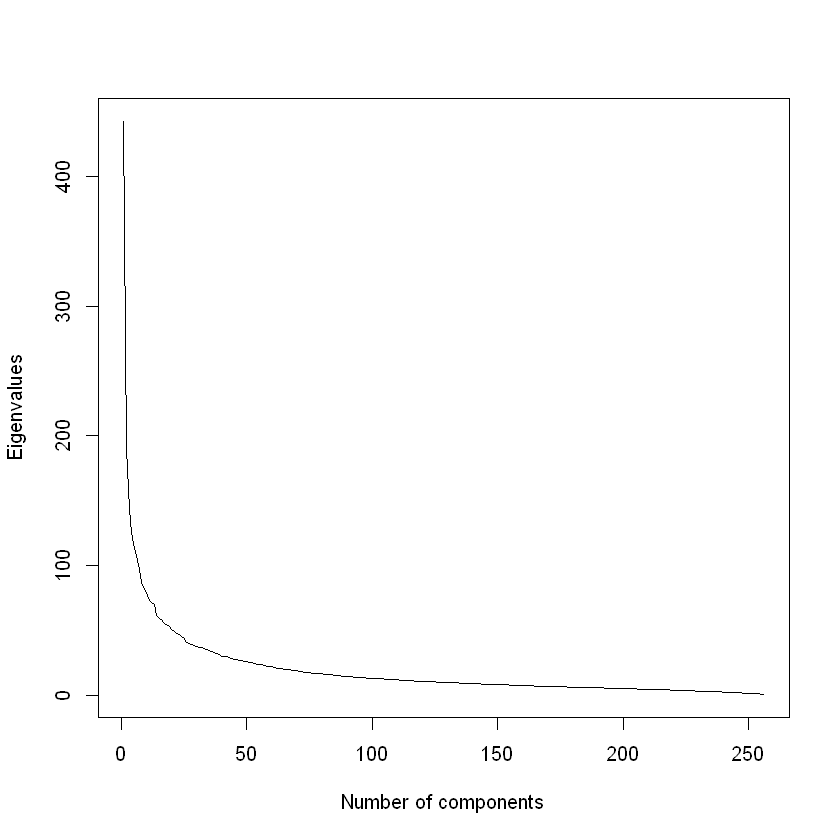

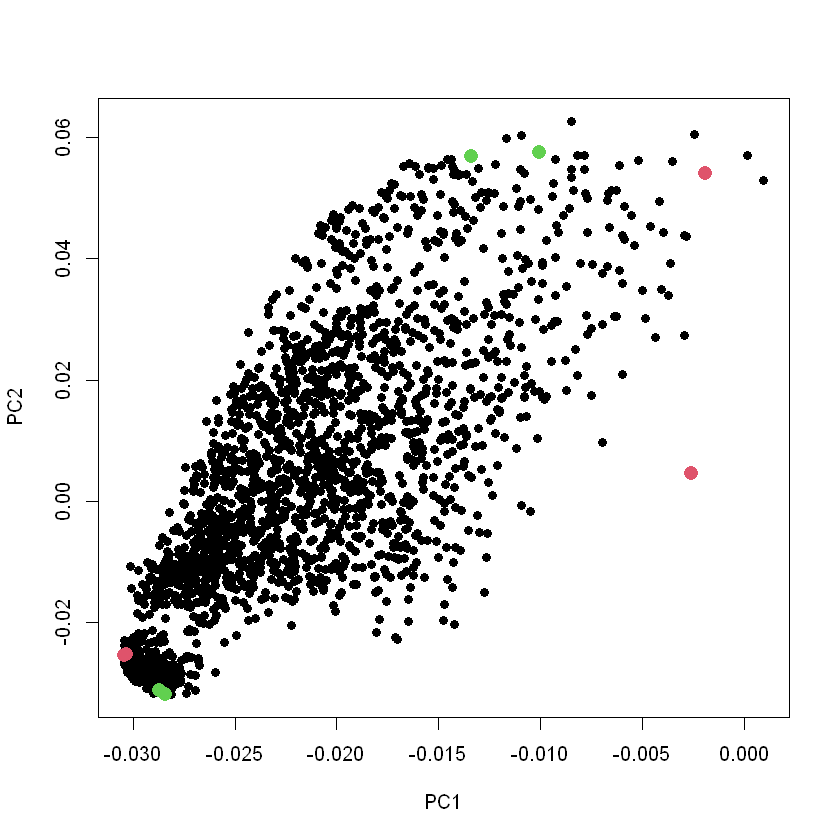

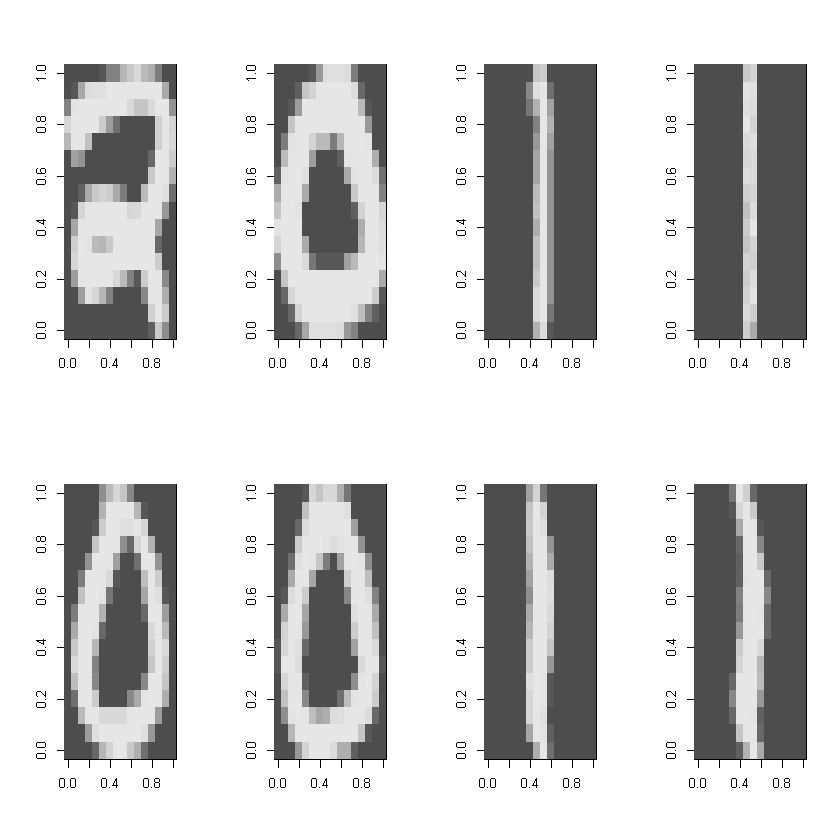

In [1]:
# SVD of the mnist data

library(ElemStatLearn)
library(nsprcomp)

data(zip.train)
set.seed(1000)
Numbers<-zip.train[sample(seq(1,7291),2000),] # a subset of the digits

ssn<-svd(Numbers[,-1])  # Computing the SVD of digits data
plot(ssn$d,type="l",xlab="Number of components",ylab="Eigenvalues") # screeplot 
# most of variance explained by 50 components (of 256)

plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=16)   # Plotting PC1 vs PC2
#pp<-identify(ssn$u[,1:2]) # use this to mark some of the observations if use in R interactive mode
aa<-rev(sort.list(ssn$u[,1]))
bb<-rev(sort.list(ssn$u[,2]))
au<-c(sample(aa[1:10],2),sample(aa[1990:2000],2))
bu<-c(sample(bb[1:10],2),sample(bb[1990:2000],2)) # Here I just pick some digits at the extremes of pc1 and pc2
points(ssn$u[au,1:2],col=2,pch=16,cex=1.5)       # and highlight them in the scatter plot
points(ssn$u[bu,1:2],col=3,pch=16,cex=1.5)


par(mfrow=c(2,4))                                # Plotting the corresponding digits
for (bb in (1:length(au))) {
   image(t(matrix(as.numeric(Numbers[au[bb],-1]),16,16,byrow=T))[,16:1], col = gray.colors(33)) }
for (bb in (1:length(bu))) {
   image(t(matrix(as.numeric(Numbers[bu[bb],-1]),16,16,byrow=T))[,16:1], col = gray.colors(33)) }

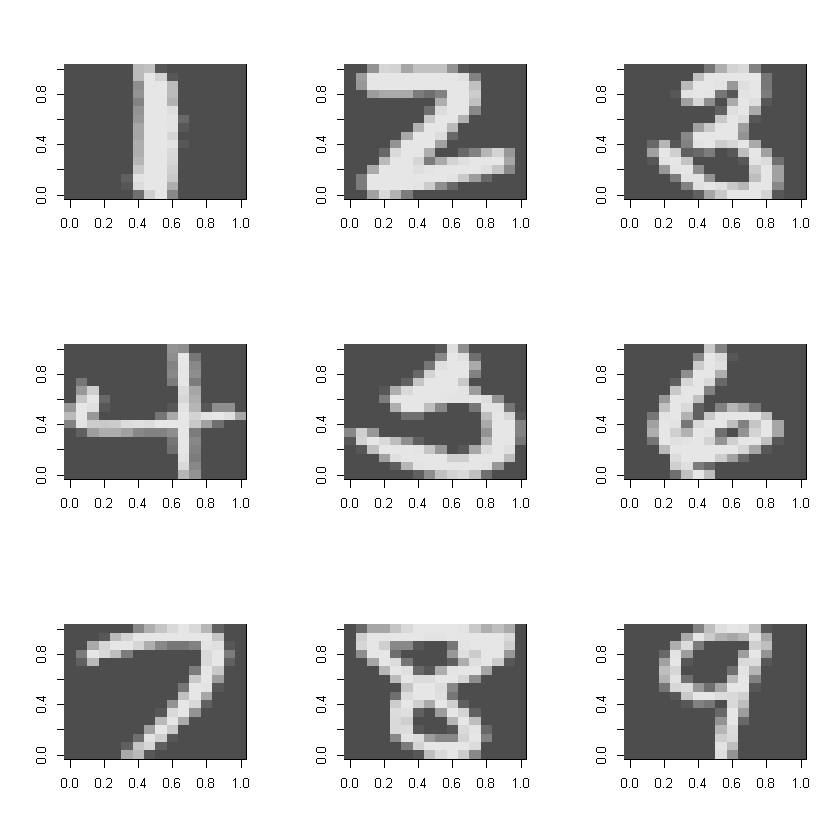

In [2]:
par(mfrow=c(3,3))       # The digits can look quite different - run this a couple of times to see.
for (zz in (1:9)) {
  iz<-sample(seq(1,dim(Numbers)[1])[Numbers[,1]==zz],1)
  image(t(matrix(as.numeric(Numbers[iz,-1]),16,16,byrow=T))[,16:1], col = gray.colors(33))
}

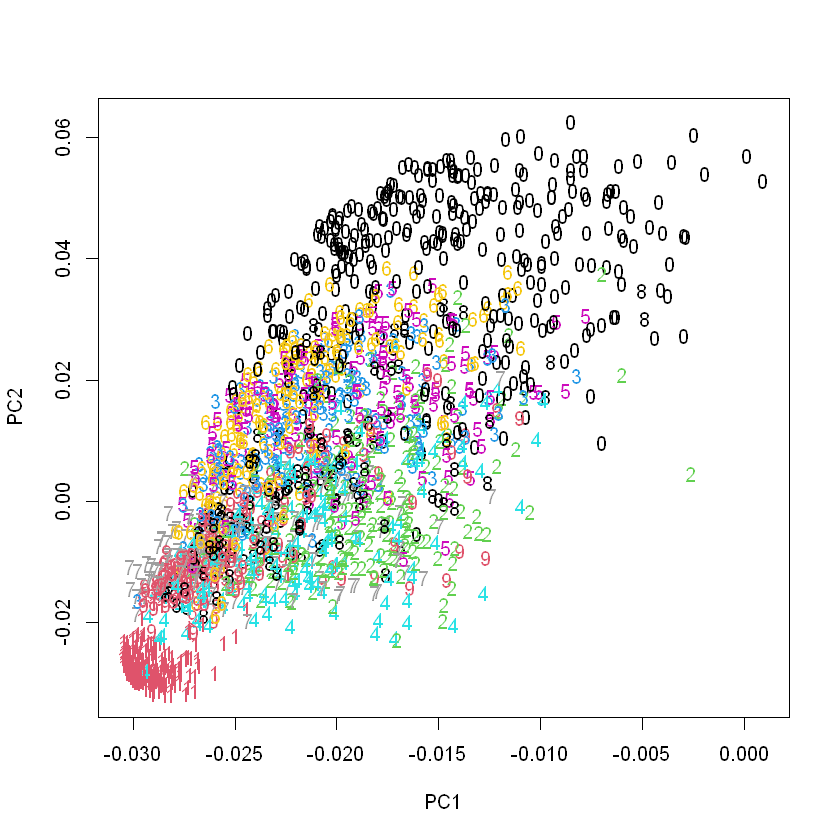

In [3]:
plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=Numbers[,1]+1) # Scatter plot with the labels

The first PCs do a pretty good job separating 1s from the rest.

How are the digits separated? What do the loadings, or directions in 256-dimensional space, look like for the 1st components?

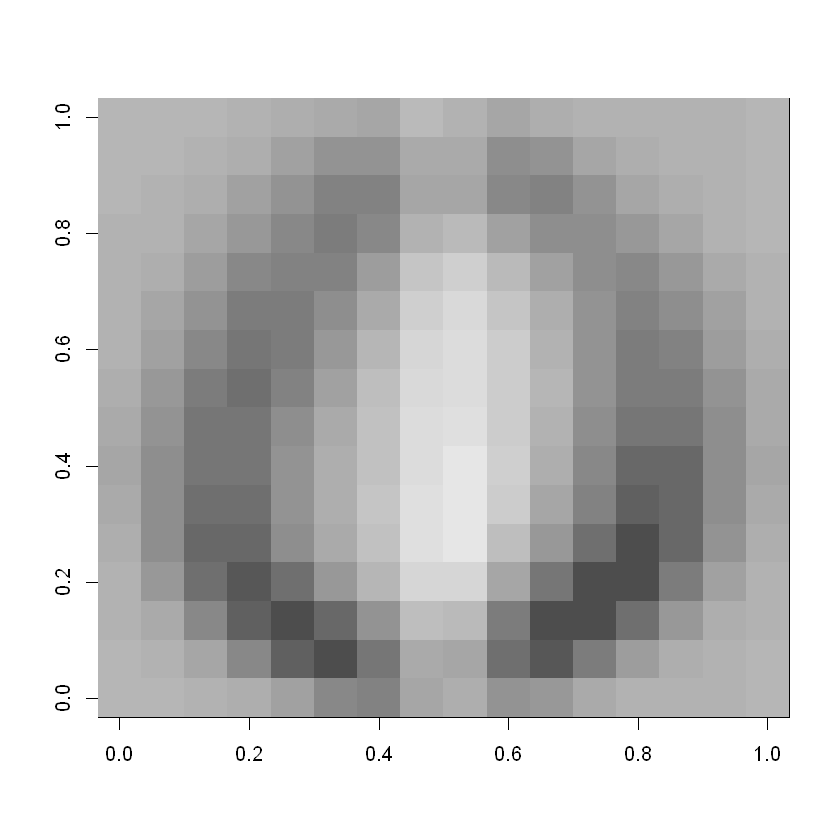

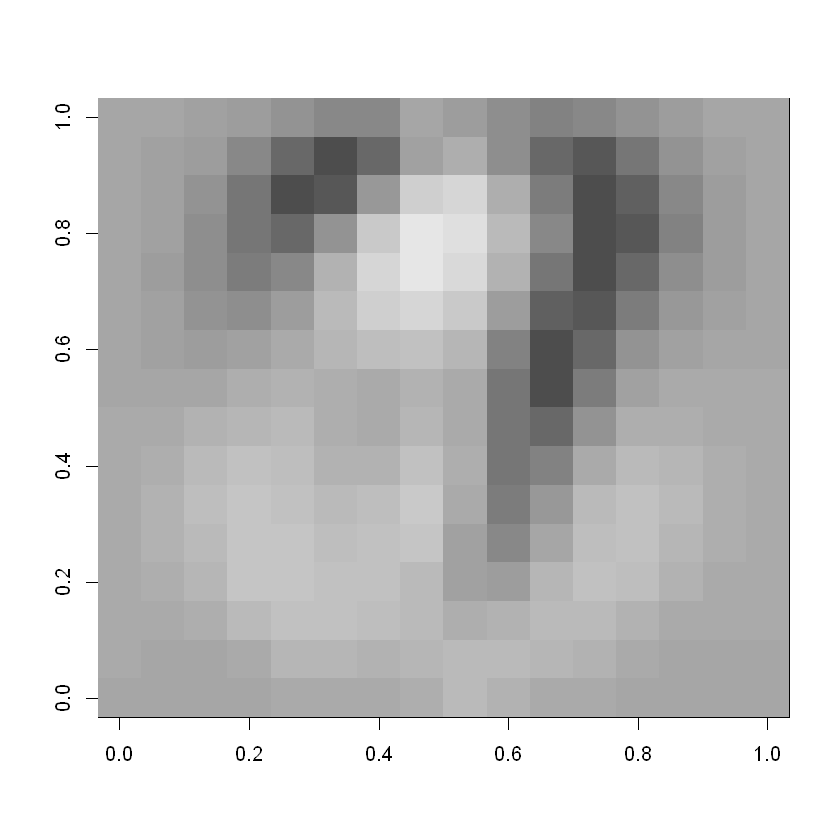

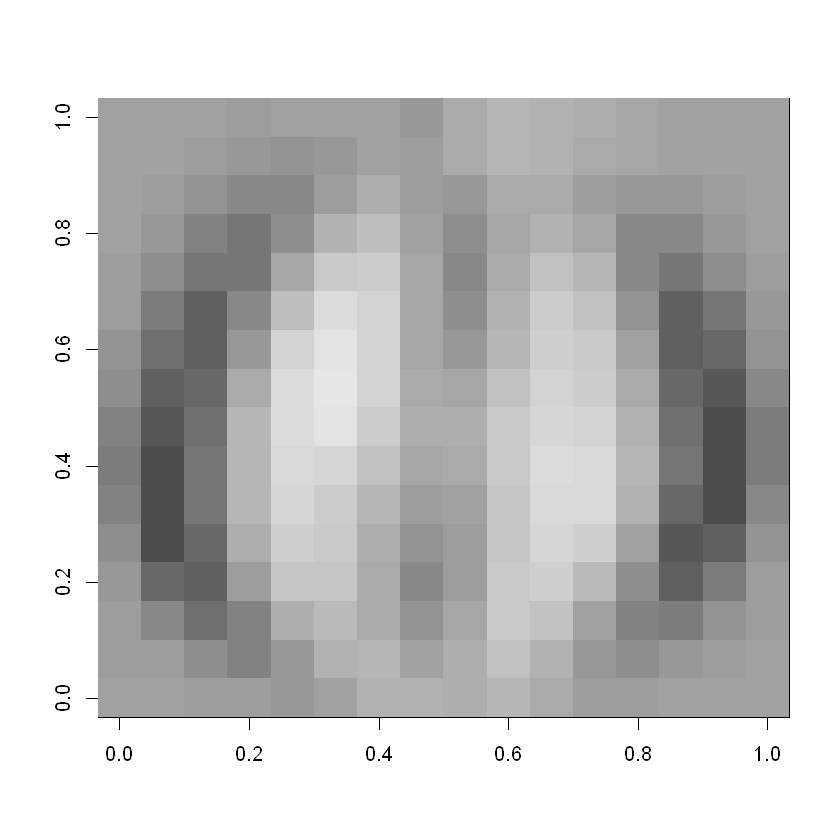

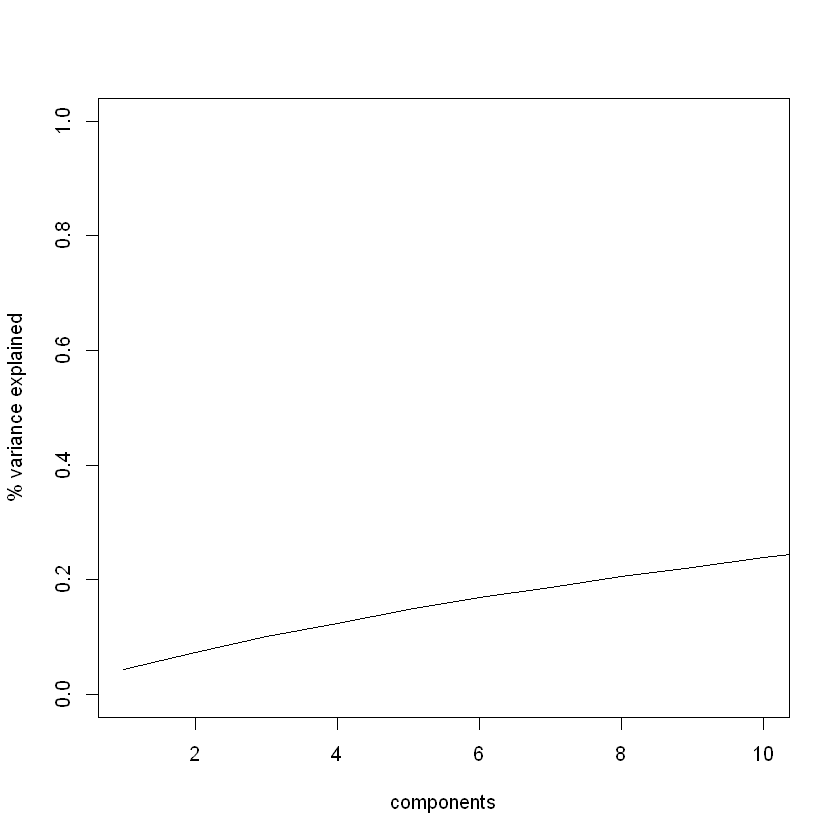

In [4]:
pp<-prcomp(Numbers[,-1])                               # Ordinary SVD
image(t(matrix(pp$rotation[,1],16,16,byrow=T))[,16:1],col=gray.colors(33)) # First 3 loadings
image(t(matrix(pp$rotation[,2],16,16,byrow=T))[,16:1],col=gray.colors(33))
image(t(matrix(pp$rotation[,3],16,16,byrow=T))[,16:1],col=gray.colors(33))
plot(cumsum(pp$sdev)/sum(pp$sdev),ylim=c(0,1),xlim=c(1,10),type="l",xlab="components",ylab="% variance explained")

What about the maximum variance pixels? Explore this more at home. Try different distance metrics and methods.

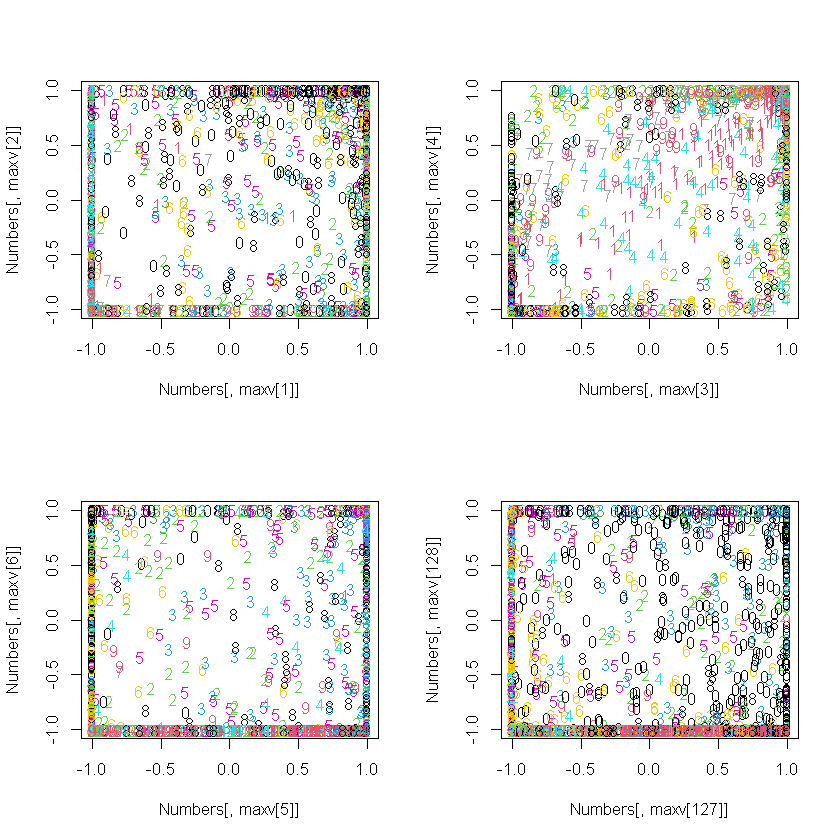

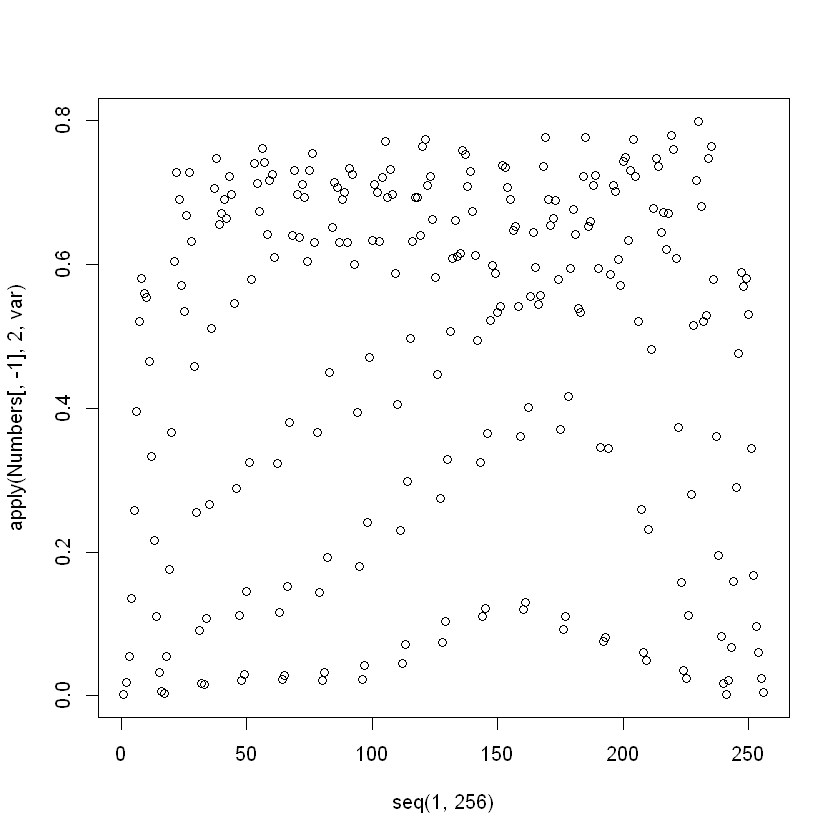

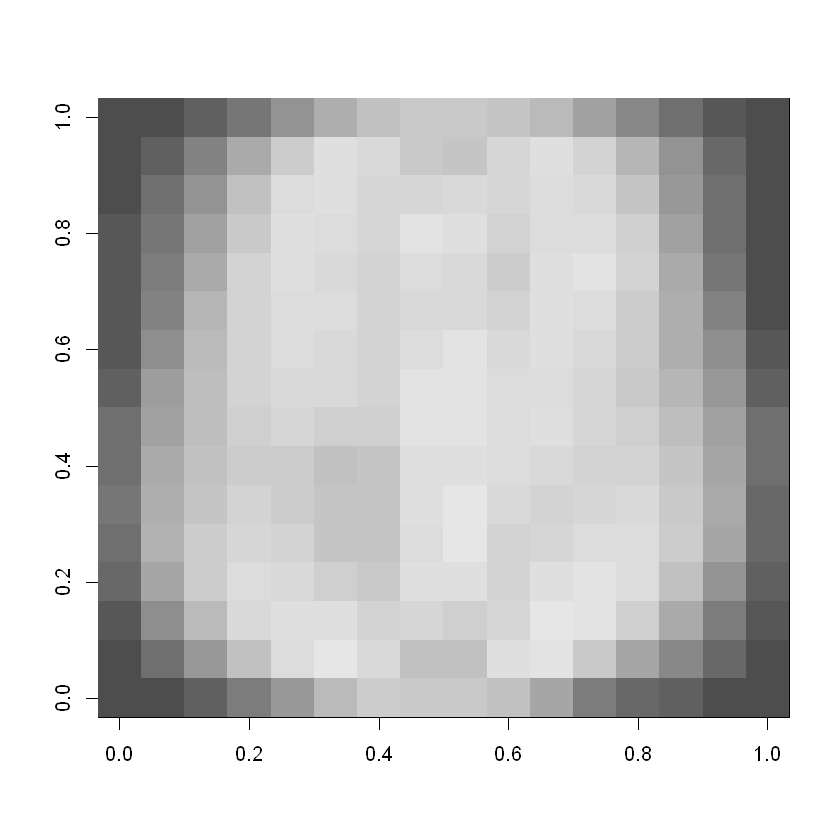

In [5]:
maxv <- sort.list(apply(Numbers[,-1],2,var),decreasing=TRUE)+1
par(mfrow=c(2,2))
plot(Numbers[,maxv[1]],Numbers[,maxv[2]], pch=as.character(Numbers[,1]),col=Numbers[,1]+1)
plot(Numbers[,maxv[3]],Numbers[,maxv[4]], pch=as.character(Numbers[,1]),col=Numbers[,1]+1)
plot(Numbers[,maxv[5]],Numbers[,maxv[6]], pch=as.character(Numbers[,1]),col=Numbers[,1]+1)
plot(Numbers[,maxv[127]],Numbers[,maxv[128]], pch=as.character(Numbers[,1]),col=Numbers[,1]+1)
par(mfrow=c(1,1))
plot(seq(1,256),apply(Numbers[,-1],2,var))
vv <- apply(Numbers[,-1],2,var)
image(t(matrix(vv,16,16,byrow=T))[,16:1],col=gray.colors(33)) 

In [6]:
# Use the max variance pixels
nuse<-20
nclust<-10
nst<-5

library(cluster)
pp <- pam(as.dist(1-cor(t(Numbers[,maxv[1:nuse]]))),nclust,nstart=nst) # remember- important to use multiple starting values
table(pp$cluster, Numbers[,1])



    
       0   1   2   3   4   5   6   7   8   9
  1  177   0   7   3   1  13  20   4   0   0
  2  137   0  12   9   4  16  20   0   3   2
  3    6   0  72   1  28   2   5 137   1  62
  4    0 274  41   5  27   3   7   2   5   6
  5    0   0  25   5  51   0   2   8  19  71
  6    0   0   6   3  42   4   0   1  39  27
  7    4   0   6  86   3  38   0   0   5   1
  8    9   0  32   1   4   6 115   0   1   0
  9    0   0  10  56  12  26   3   0  57  12
  10   0   0   8  11   7  53  14   0   4   1

Try with different number of pixels and distance metrics at home.

Let's switch back to using PCs for now and explore some more methods.

In [7]:
# Use the leading 25 PCs - try more or fewer PCs
nuse<-25
nclust<-10
nst<-10

kk <- kmeans(ssn$u[,1:nuse],nclust,nstart=nst)
table(kk$cluster, Numbers[,1])
library(cluster)

pp<-pam(dist(ssn$u[,1:nuse]),nclust,nstart=nst)
table(pp$cluster, Numbers[,1])

    
       0   1   2   3   4   5   6   7   8   9
  1   11   7  13  16   2  53  20   0 111   1
  2    0   0   3   1  31   0   1  66   1 139
  3    4   0   4 160   1  91   0   1  11   1
  4  142   0   1   0   0   1   8   0   1   0
  5    3   0  22   0 134   7   4   1   5  27
  6    0   0   5   2   4   2   0  84   0  13
  7    1   0 166   1   4   0   2   0   0   0
  8    0 267   0   0   2   0   0   0   0   1
  9    1   0   2   0   1   7 143   0   0   0
  10 171   0   3   0   0   0   8   0   5   0

    
       0   1   2   3   4   5   6   7   8   9
  1  142   0   4   1   0   0  17   0   2   1
  2    2   0  12   5  46   7   5  11  35  52
  3    3 162   8   4   4  11   1   0   1   0
  4   16   2  73  12  94  83  34   5  43  14
  5  126   0   4   0   0   1   1   0   2   0
  6   11   0   8   4  15   3   0  27  12  97
  7   13   0  63  16  11   8   0 107   4  14
  8    4 110  43  10   8  17   7   2  30   4
  9   14   0   3   0   1  13 121   0   2   0
  10   2   0   1 128   0  18   0   0   3   0

Clustering works "OK" to retrieve the digits but clearly some digits are easier than others. The 1s are easily separated but the 0s require more than one cluster to summarize. What happens when you use more clusters? More or fewer PCs?


Let's try some standard techniques for selecting the number of clusters. Note, you can combine this with a wrapper for selecting the number of PCs (or max variance pixels to use).

Installing package into 'C:/Users/jornsten/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependency 'gmp'




package 'gmp' successfully unpacked and MD5 sums checked
package 'ClusterR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jornsten\AppData\Local\Temp\RtmpUF0q45\downloaded_packages


Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"


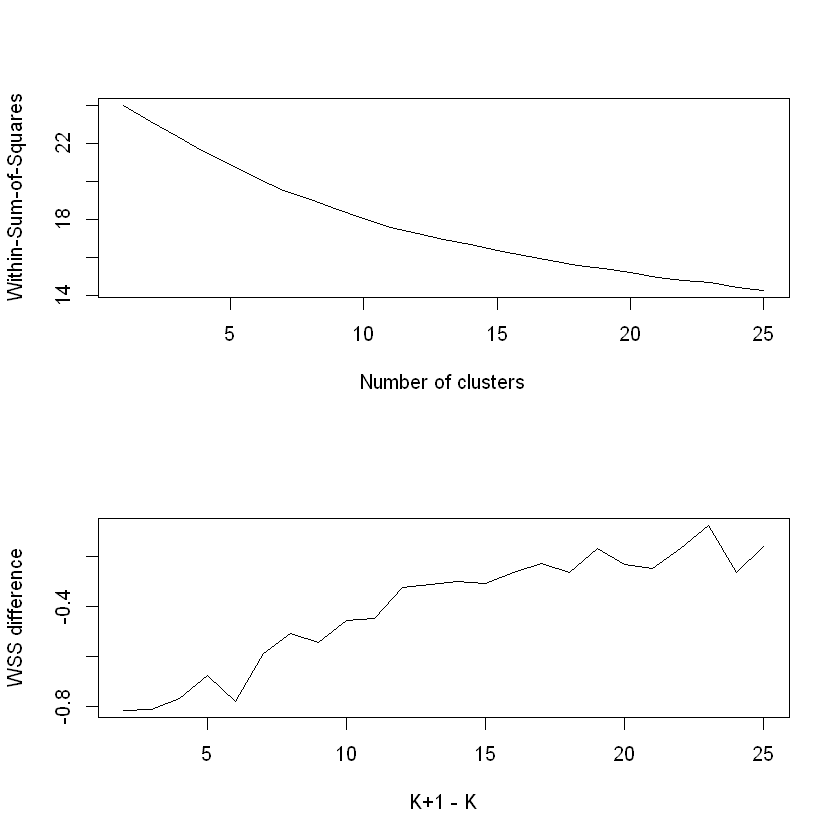

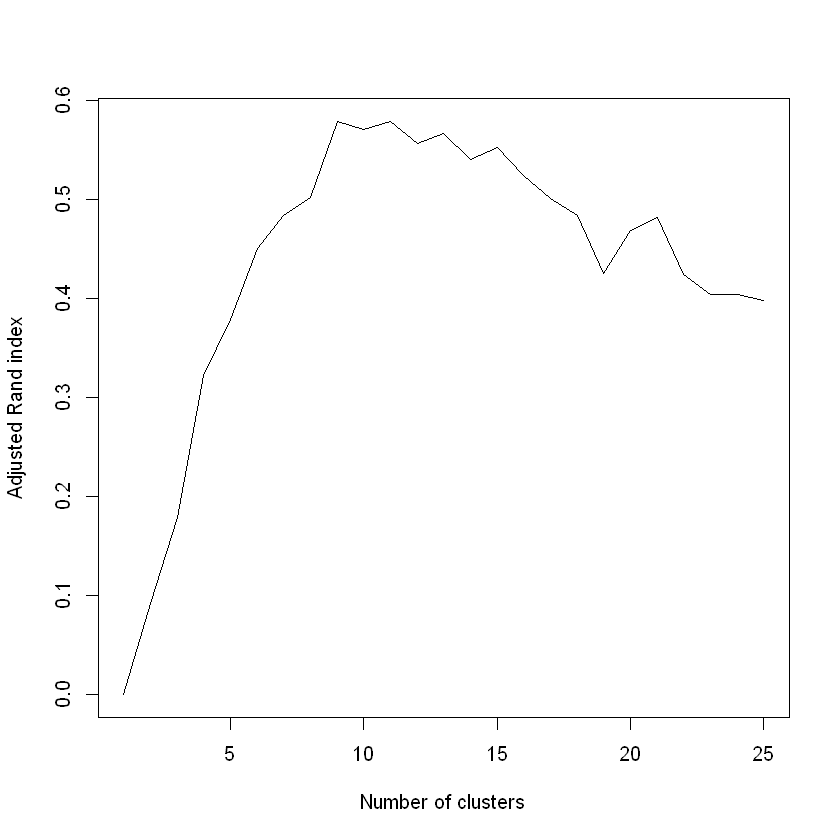

In [9]:
#install.packages("ClusterR")
library(ClusterR)

nuse<-25

WSS <- rep(0,25)
AdjRand <- rep(0,25)
ClusterLabs <- matrix(0,dim(Numbers)[1],25)
for (K in (1:25)) {
  kk <- kmeans(ssn$u[,1:nuse],K,nstart=10) 
  WSS[K] <- kk$tot.withinss 
  ClusterLabs[,K] <- kk$cluster
  AdjRand[K] <- external_validation(Numbers[,1],kk$cluster)
}  
   
par(mfrow=c(2,1))
plot(seq(1,25),WSS,type="l",xlab="Number of clusters", ylab="Within-Sum-of-Squares")
plot(seq(2,25),diff(WSS),type="l",xlab="K+1 - K",ylab="WSS difference")
par(mfrow=c(1,1))
plot(seq(1,25),AdjRand,type="l",xlab="Number of clusters", ylab="Adjusted Rand index")



Here, I compare the WSS (and it's derivative) - looking for an elbow in the WSS plot to indicate the "right" number of clusters. 

I also included an external validation index, the adjusted Rand index. The adjusted Rand index compares the cluster labels to the known digit labels in the following sense; consider the cluster labels and the class labels as partitions of the data. Now, the agreement is good if the pairs of observations that co-cluster and anti-cluster do so in both partitions. These pair agreements are the numerator of the Rand index whereas the denominator is all selection of pairs (n choose 2). The adjusted Rand index is a variant that corrects the Rand index for pair agreements that can happen just by chance. An ARI (adjusted rand index) of 0.5 is "OK" but not stellar. For good agreement you want something around 0.8 or so. 

Here, both the elbow method and the ARI seems to support around 10+ clusters (for 25PCs) - but that doesn't mean we retrieved all the classes of course.

Let's try PAM as well. First a plotting function for the silhouette width. 

In [10]:
plotsilhoutte <- function(clusterlabs, silw) {
  cc<-sort.list(clusterlabs)
  silw[,1] <- silw[cc,1]
  silw[,3] <- silw[cc,3]
  clusterlabs <- clusterlabs[cc]                                            
  data_plot <- tibble(
   obs = as.factor(rownames(silw)),
   clusterlabs = as.factor(silw[,1]),
   sw = silw[,3]) %>%   # Silhouette width
   arrange(clusterlabs, sw) %>%
   mutate(obs = factor(obs, levels = obs))

  p1 <- ggplot(data_plot) +
   geom_bar(aes(x = obs, y = sw, fill = clusterlabs), stat = "identity") +
   coord_flip() +
   scale_x_discrete("Observation") +
   scale_y_continuous(
     "Silhouette Width", breaks = seq(-1, 1, by = 0.2)) +
   scale_fill_manual(values = cbPalette[-1], guide = "none") +
   theme_minimal() +
   theme(
     panel.grid = element_blank(),
     axis.text.y = element_blank(),
     axis.text.x = element_text(size = 7),
     axis.title = element_text(size = 7))
return(p1)}

I run PAM with euclidean distance for 10 and 5 clusters as well as a run with 1-correlation as the distance metric.

Try this with different number of PCs to see what happens.

    
       0   1   2   3   4   5   6   7   8   9
  1  142   0   0   0   1   4   8   0   1   0
  2    0   0   6   3   1   1   0 102   0  11
  3    0 271   0   2  16   0   0   0   1   2
  4    7   2  11  45   9   8   3   3 110  14
  5  138   0   1   6   3   2   9   0   0   0
  6   23   0  14 114   0 115   4   0  12   0
  7    2   0   4   5  46  13   0  46  10 125
  8    2   0  13   1  91   4   3   1   0  30
  9    0   0 167   0   9   0   7   0   0   0
  10  19   1   3   4   3  14 152   0   0   0

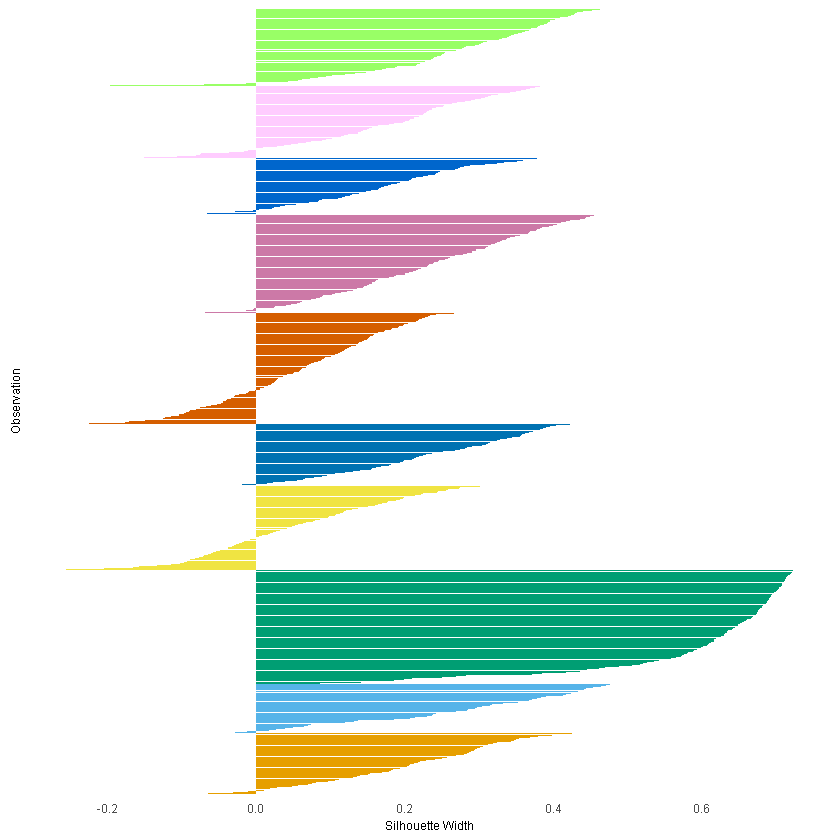

   
      0   1   2   3   4   5   6   7   8   9
  1 229   0   0   5   0   7  17   0   2   0
  2   0   0   6  20  19   5   1 149   1 122
  3   0 272   1   1   9   1   0   0   0   3
  4   9   0 105  76 132  43   8   1 122  54
  5  95   2 107  78  19 105 160   2   9   3

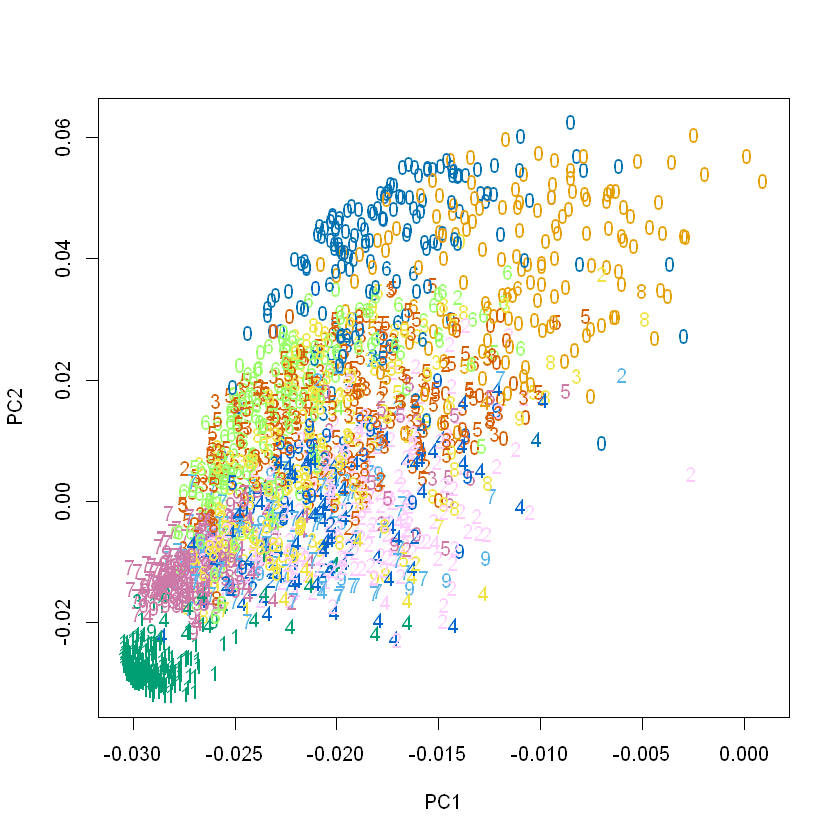

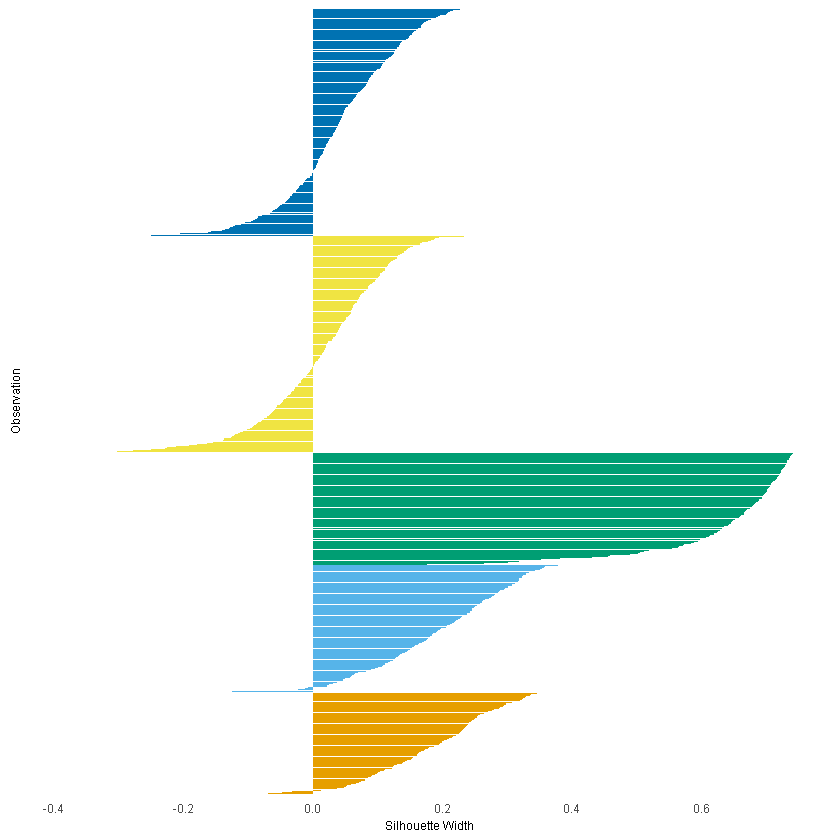

    
       0   1   2   3   4   5   6   7   8   9
  1  133   0   8   2   3  10  18  11   0   0
  2    5   0  16  10   2   1   0 104   1  12
  3    0 272   2   3  14   1   0   1  10   6
  4    3   2   5  29   2  51   0   1 102   5
  5  158   0   3   6   9   5  14   0   0   1
  6    1   0   1   3  27   3   0  26   4 124
  7   16   0  13   4 110   7   3   1  10  34
  8    1   0 160   0   6   1   3   1   6   0
  9   13   0   2   1   4  25 147   0   0   0
  10   3   0   9 122   2  57   1   7   1   0

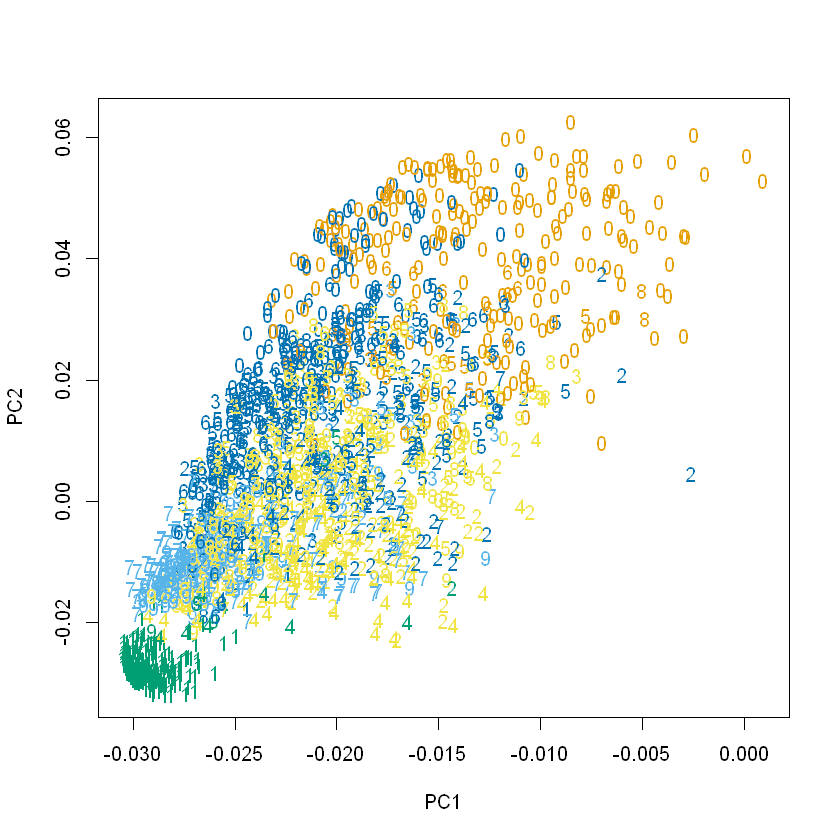

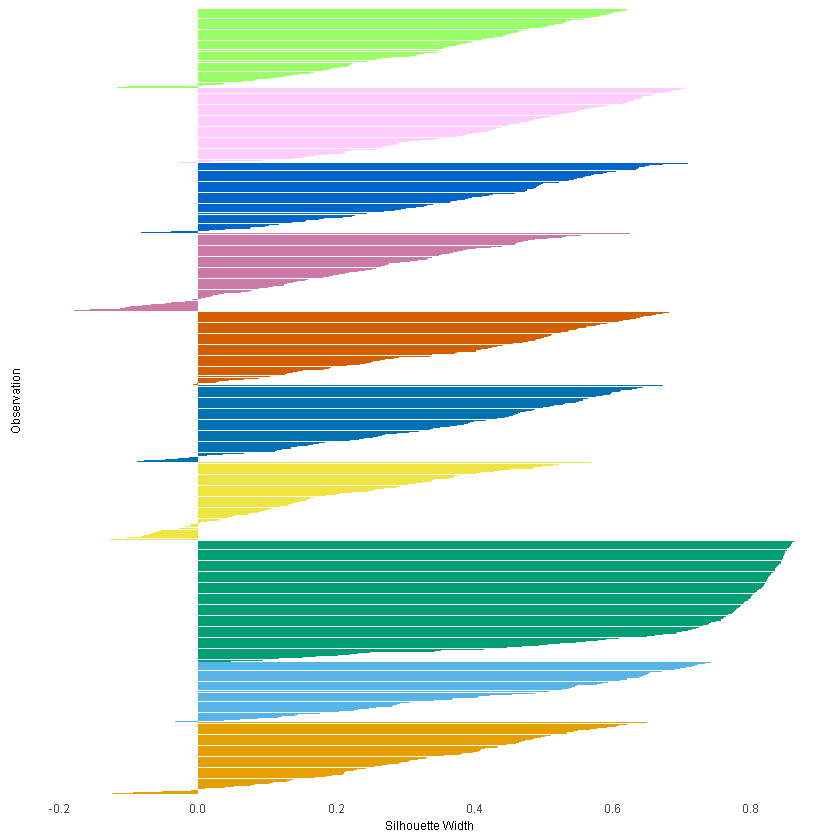

In [13]:
#install.packages("tidyverse")
library(tidyverse)
cbPalette <- c(
  "#999999", "#E69F00", "#56B4E9", "#009E73",
  "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#0066CC", "#FFCCFF", "#99FF66",
  "#3333FF","#666699","#CCCCCC","#000033","#990033")


nuse<-10
nclust<-10
nst<-3


pp<-pam(dist(ssn$u[,1:nuse]),nclust,nstart=nst)
table(pp$cluster, Numbers[,1])


plsil<-plotsilhoutte(pp$cluster,silhouette(pp))
plsil

plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp$cluster]) # Scatter plot with the labels
###############
pp<-pam(dist(ssn$u[,1:nuse]),5,nstart=nst)
table(pp$cluster, Numbers[,1])


plsil<-plotsilhoutte(pp$cluster,silhouette(pp))
plsil

plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp$cluster]) # Scatter plot with the labels

#####
pp<-pam(as.dist(1-cor(t(ssn$u[,1:nuse]))),nclust,nstart=nst)
table(pp$cluster, Numbers[,1])


plsil<-plotsilhoutte(pp$cluster,silhouette(pp))
plsil


The silhouettes seem to support a large number of clusters (see the poor performance for K=5). However, from the confusion matrices you can see that it's not separating out the digits but rather refines the description of, for example, the large and diverse 0 class.

Does the distance metric chosen impact how many PCs you should use?

    
       0   1   2   3   4   5   6   7   8   9
  1  133   0   2   1   3   2  16   0   1   0
  2    2   0  25   6  12   4   0 102   2  33
  3    0 271   3   1  20   2   0   1   1   1
  4    0   0  14   2 106  43   7   6  26  29
  5  153   0   5   1   8   1  13   5  10   5
  6    2   0   5  14  15   3   0  31   3 104
  7    2   0 145   3   8   3   5   7   5   1
  8   22   1   4   0   2  18 138   0   1   1
  9   11   2  13  35   4  27   6   0  81   4
  10   8   0   3 117   1  58   1   0   4   4

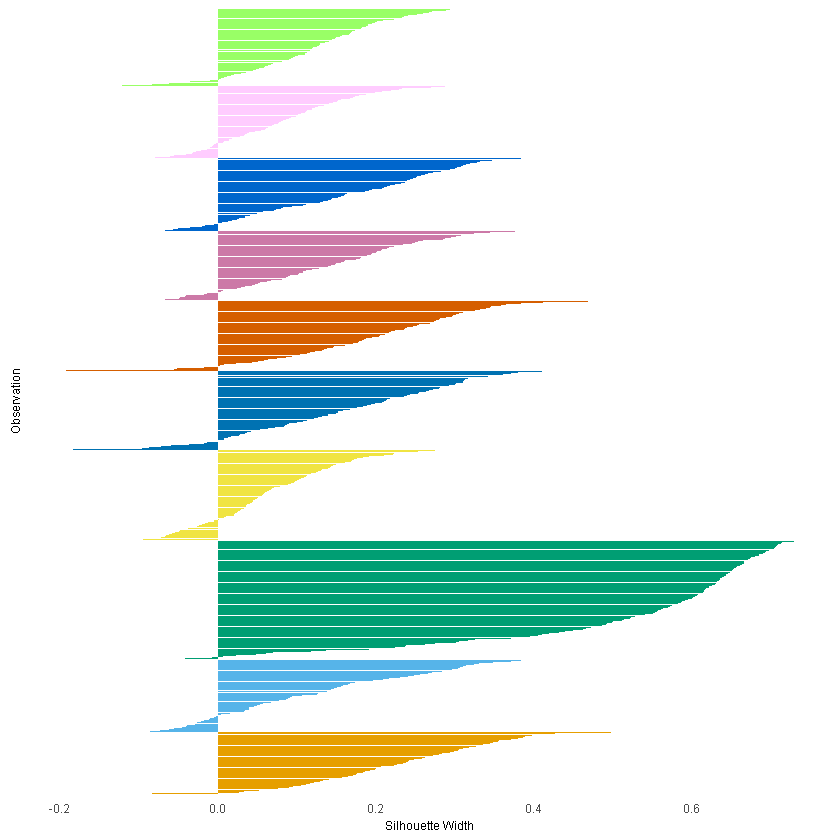

In [14]:
# Change the number of PCs used and compare - what happens with euclidean distance? what about correlation?

nuse<-25
nclust<-10
nst<-5

#pp<-pam(ssn$u[,1:nuse],nclust,nstart=nst)
pp<-pam(as.dist(1-cor(t(ssn$u[,1:nuse]))),nclust,nstart=nst)
table(pp$cluster, Numbers[,1])


plsil<-plotsilhoutte(pp$cluster,silhouette(pp))
plsil


Let's use average silhoutte width to select the number of clusters.

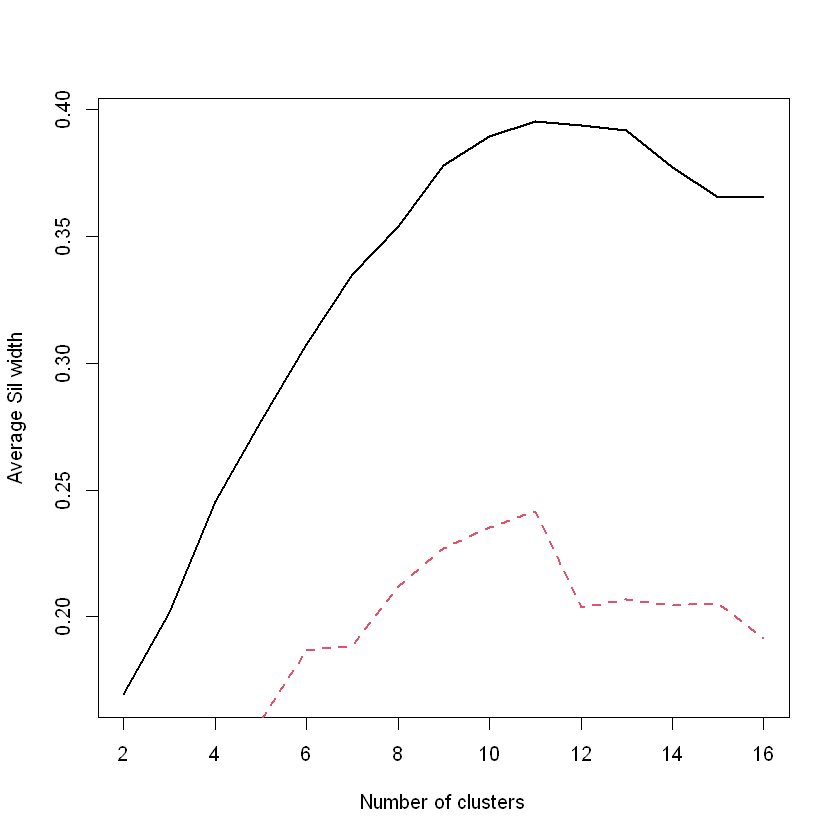

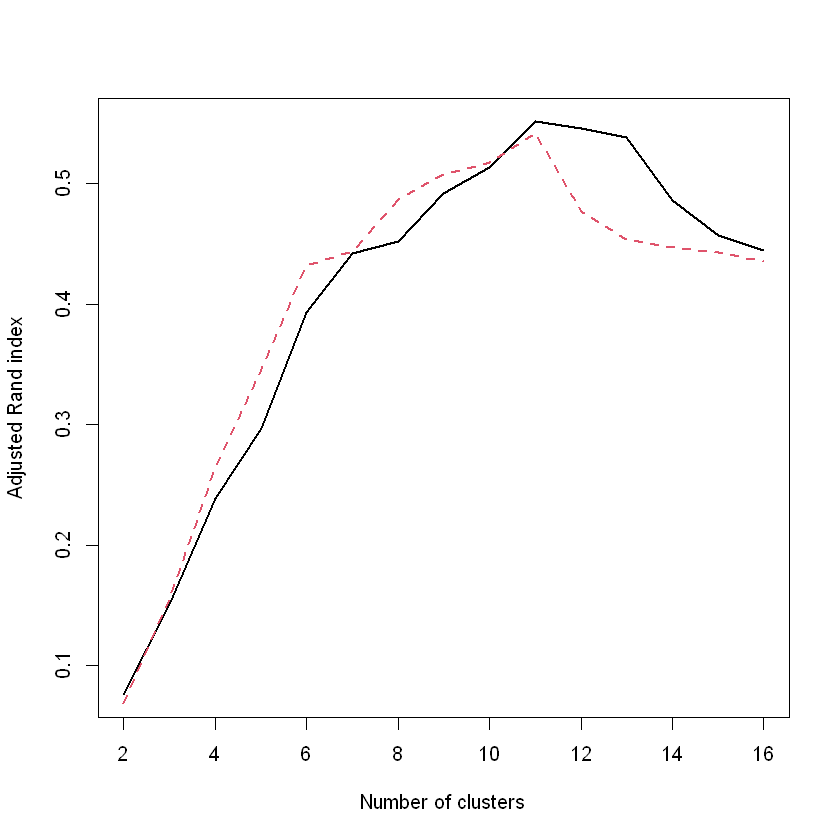

In [16]:
nuse<-10
nst<-3

####
SilAvg <- matrix(0,15,2)
AdjRand <- matrix(0,15,2)
par(mfrow=c(2,2))
Ksel<-c(3,5,10,15)
Ind<-c(1,2,3,4)
plist1<-list()
plist2<-list()
a<-0
#
for (K in (2:16)) {
  pp1 <- pam(as.dist(1-cor(t(ssn$u[,1:nuse]))),K,nstart=nst) 
  pp2 <- pam(dist(ssn$u[,1:nuse]),K,nstart=nst) 
  SilAvg[K-1,1] <- pp1$silinfo$avg 
  SilAvg[K-1,2] <- pp2$silinfo$avg 
  AdjRand[K-1,1] <- external_validation(Numbers[,1],pp1$cluster)
  AdjRand[K-1,2] <- external_validation(Numbers[,1],pp2$cluster)
  #
  if (any(Ksel==K)) {
     a<-a+1
     plsil<-plotsilhoutte(pp1$cluster,silhouette(pp1))
     plist1[[a]]<-plsil
     plsil<-plotsilhoutte(pp1$cluster,silhouette(pp2))
     plist2[[a]]<-plsil
  }
}  
   
par(mfrow = c(1,1))
plot(seq(2,16),SilAvg[,1],type="l",lwd=2,xlab="Number of clusters", ylab="Average Sil width")
lines(seq(2,16),SilAvg[,2],col=2,lwd=2,lty=2)
plot(seq(2,16),AdjRand[,1],type="l",lwd=2, xlab="Number of clusters", ylab="Adjusted Rand index")
lines(seq(2,16),AdjRand[,2],col=2,lwd=2,lty=2)


The silhouette width also proposes 10-12 clusters. The ARI is "OK" but not great for this range of clusters.

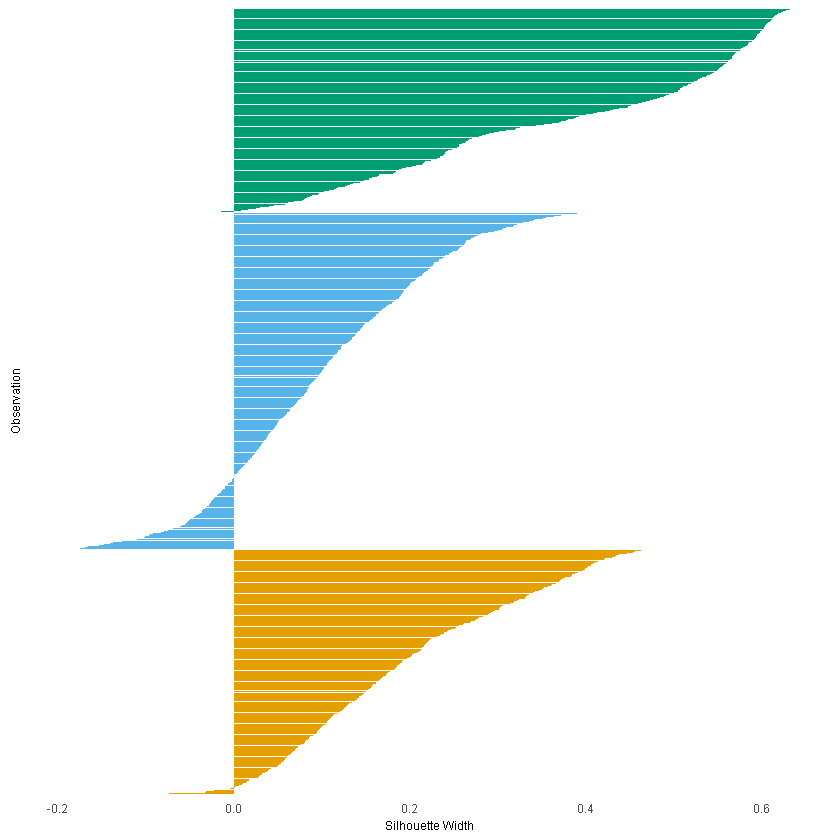

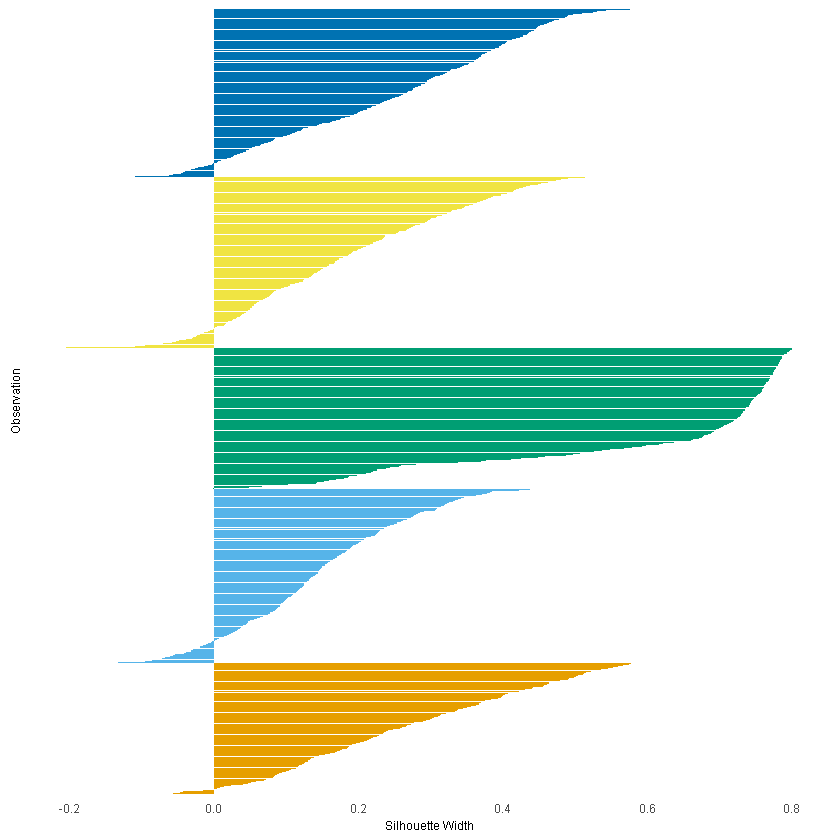

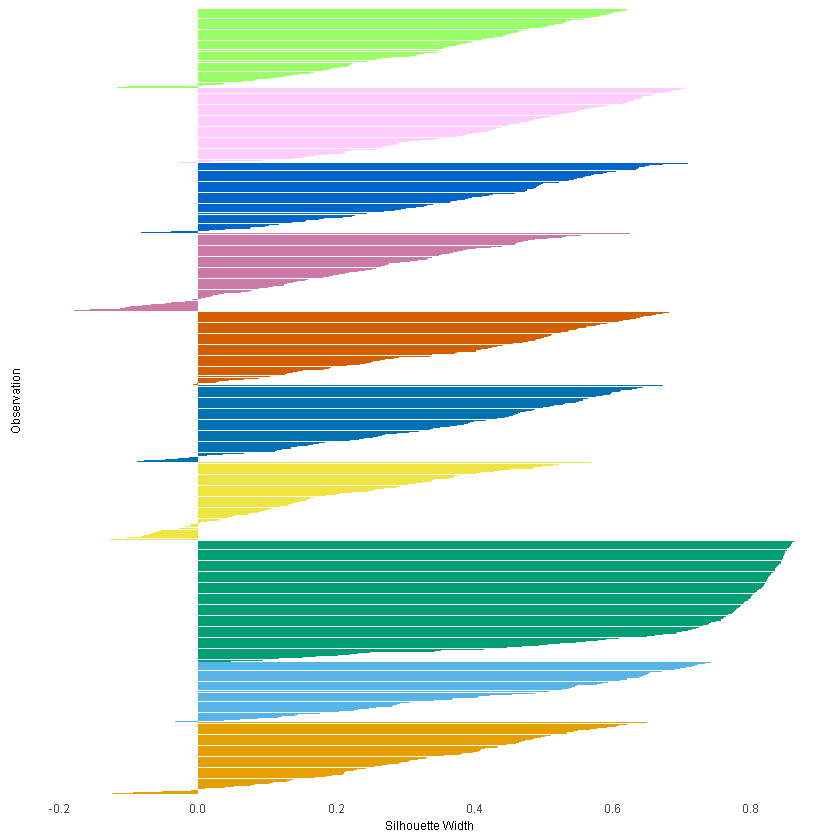

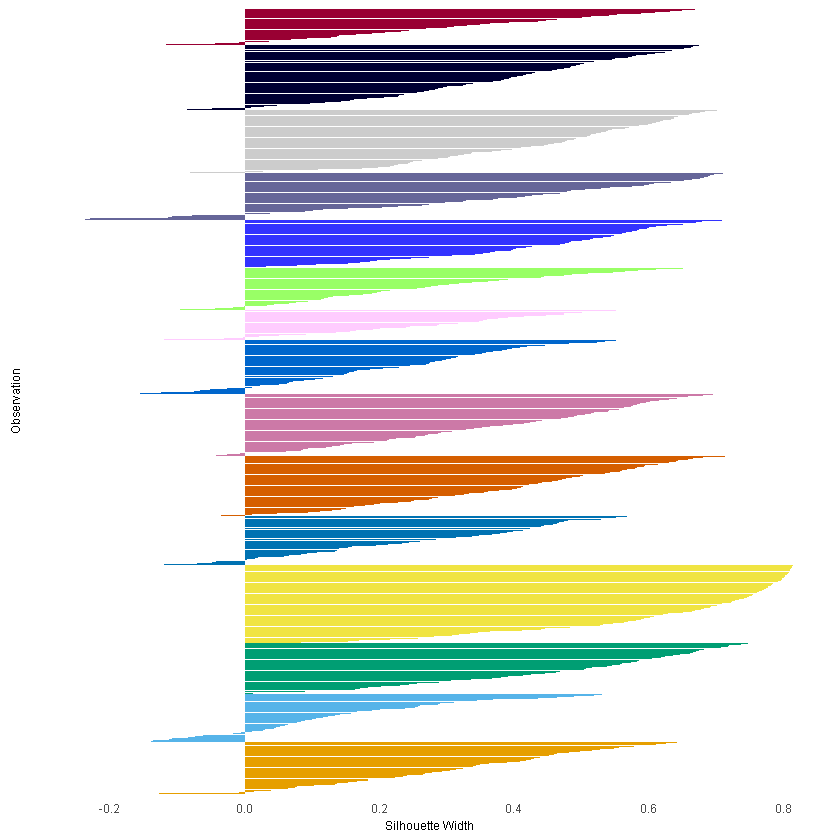

In [17]:
plist1[[1]]
plist1[[2]]
plist1[[3]]
plist1[[4]]

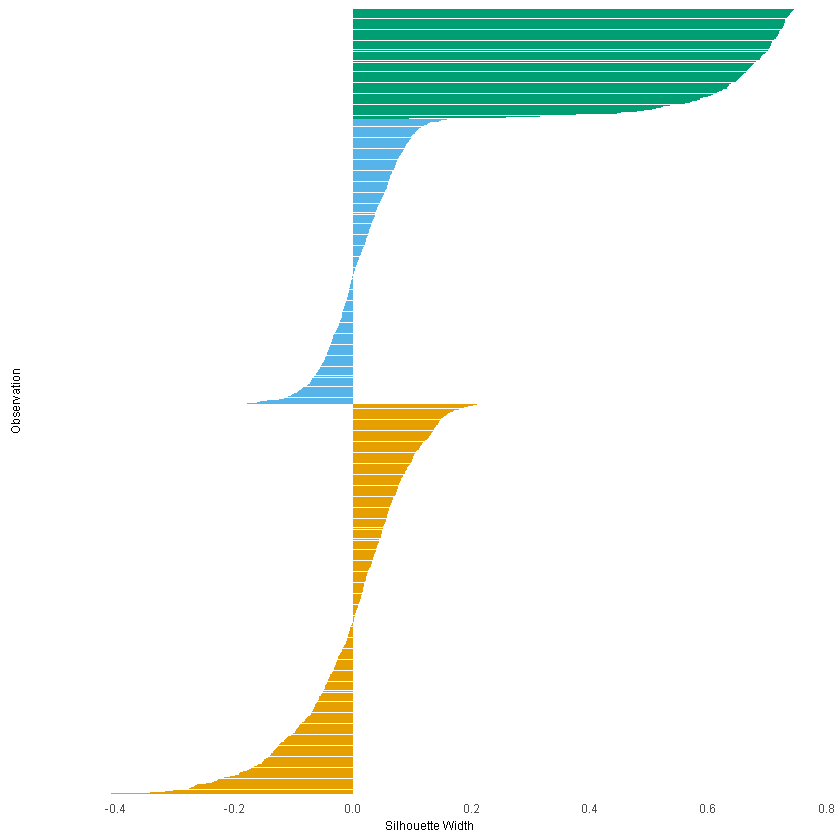

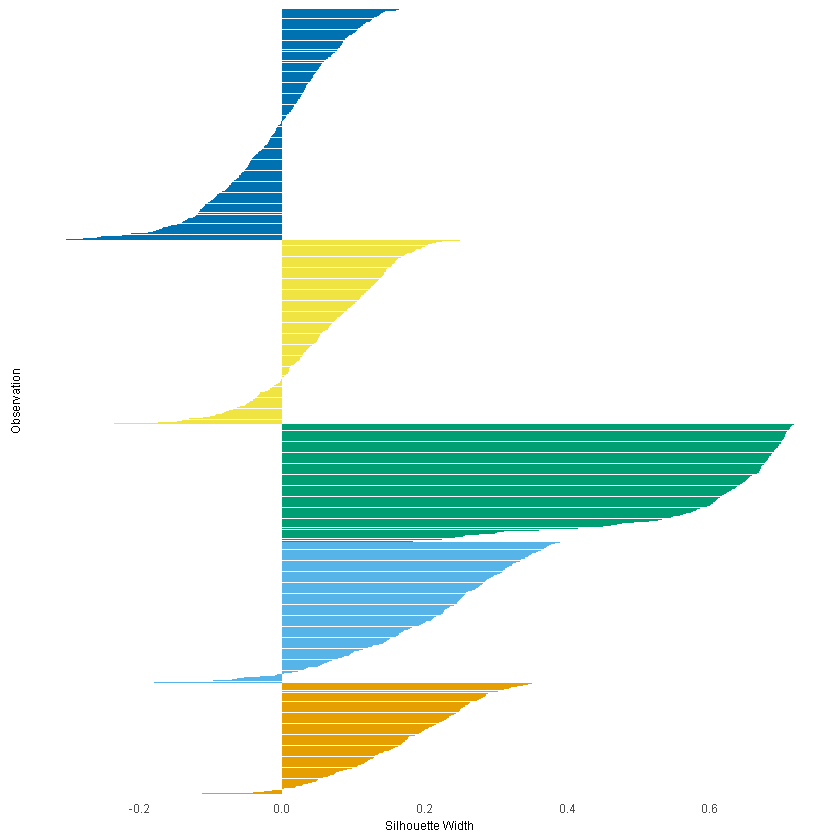

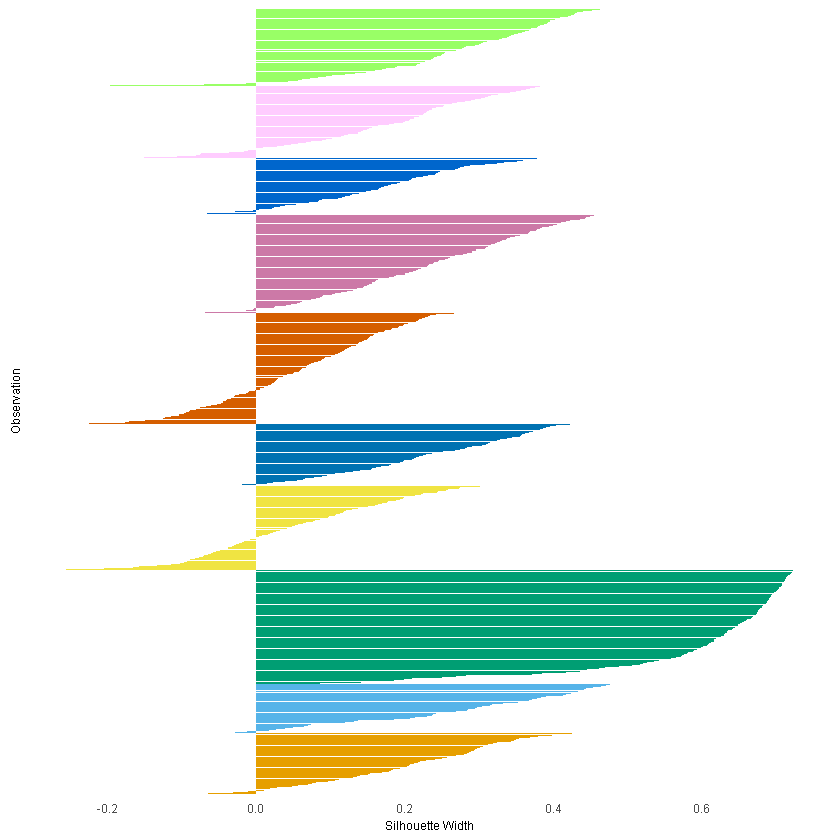

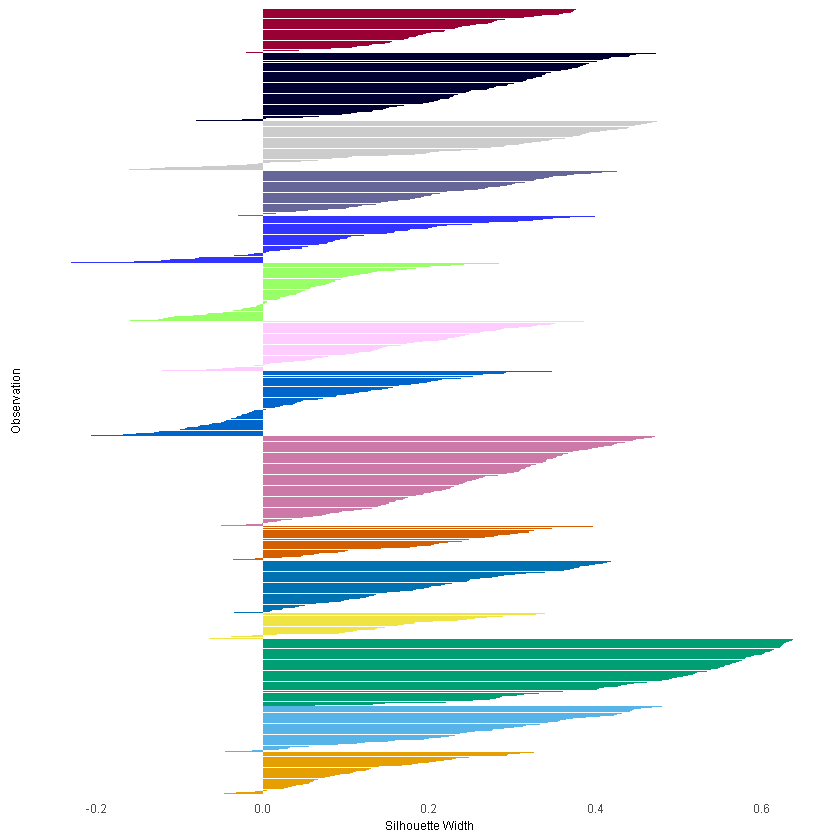

In [18]:
plist2[[1]]
plist2[[2]]
plist2[[3]]
plist2[[4]]

Clearly, the distance metric matters and the chosen input dimensions plays a role as well. Play around with more metrics and different pixel filters at home.

Let's have a go with hierarhical clustering next.

In [21]:
# A plotting function for dendrograms
#install.packages("dendextend")
library(dendextend)

plot_dendro <- function(labvec, hc, title, cut) {
  dend <- as.dendrogram(hc)
  labels(dend) <- NULL
  dend <- dend %>%
    set("leaves_pch", 0) %>%
    set("leaves_cex", 0.5) %>%
    set("leaves_col", cbPalette[-1][as.numeric(labvec[order.dendrogram(dend)])+1])
  par(mar=c(.5,4,1,.5), bg = "transparent",
    cex.lab = 0.8, cex.axis = 0.8, cex.main = 0.8)
  plot(dend, ylab = "Height", main = title)
  abline(h = cut[1], lty = 5)
  abline(h = cut[2], lty = 2)
}

I start by running hierarchical clustering on the leading PCs with complete linkage and euclidean distance. At home, try different distance metrics and number of PCs or other input choices to see what happens.

Warning message in `labels<-.dendrogram`(`*tmp*`, value = NULL):
"The lengths of the new labels is shorter than the number of leaves in the dendrogram - labels are recycled."
Warning message in rep(new_labels, length.out = leaves_length):
"'x' is NULL so the result will be NULL"


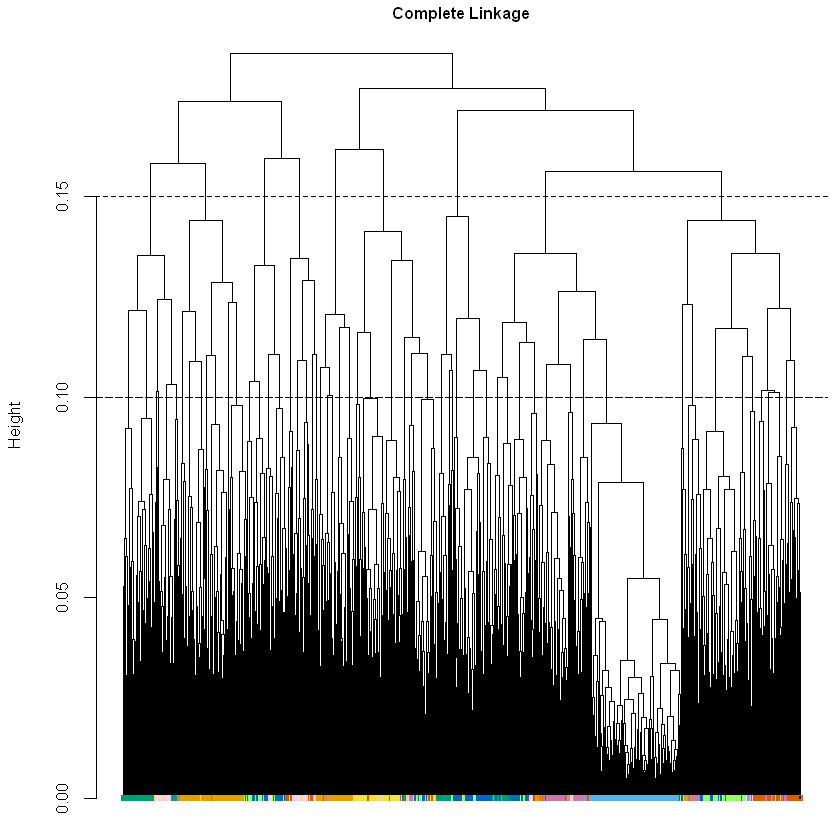

In [22]:
nuse <- 10

hc_complete <- hclust(dist(ssn$u[,1:nuse]), method = "complete")

plot_dendro(Numbers[,1],hc_complete, "Complete Linkage", c(0.1,0.15))


There is one cluster that sticks out - which digits do you think this corresponds to?

Let's check which clusters were found by cutting the branches of the dendrogram.

   
      0   1   2   3   4   5   6   7   8   9
  1 184   0   0   1   0   4   9   0   0   0
  2   0   0  43   7   1   1   0  99   1  10
  3  22 264  33   4  77  13 114   0  17   9
  4   0   0   0   5   1  27   0   0  54   3
  5 100   0   2   0   0   1   7   0   0   0
  6  22  10   7  10  17  97  46  36   9  99
  7   0   0   0   0  73   1   0   1  11  35
  8   5   0  18 145   7  17  10  14   6  24
  9   0   0 116   8   3   0   0   2  36   2

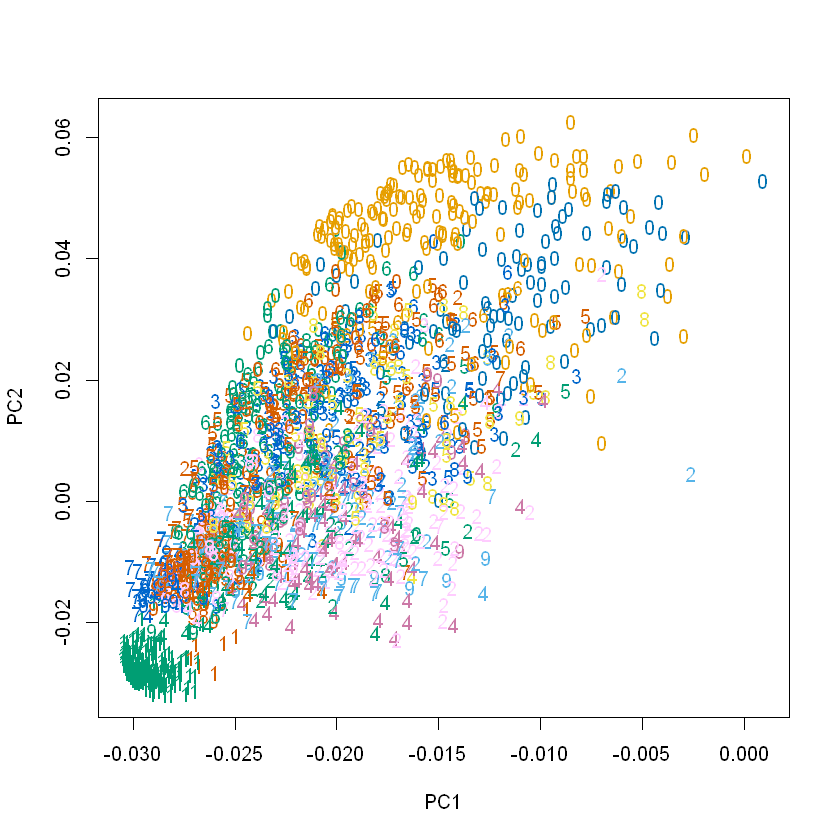

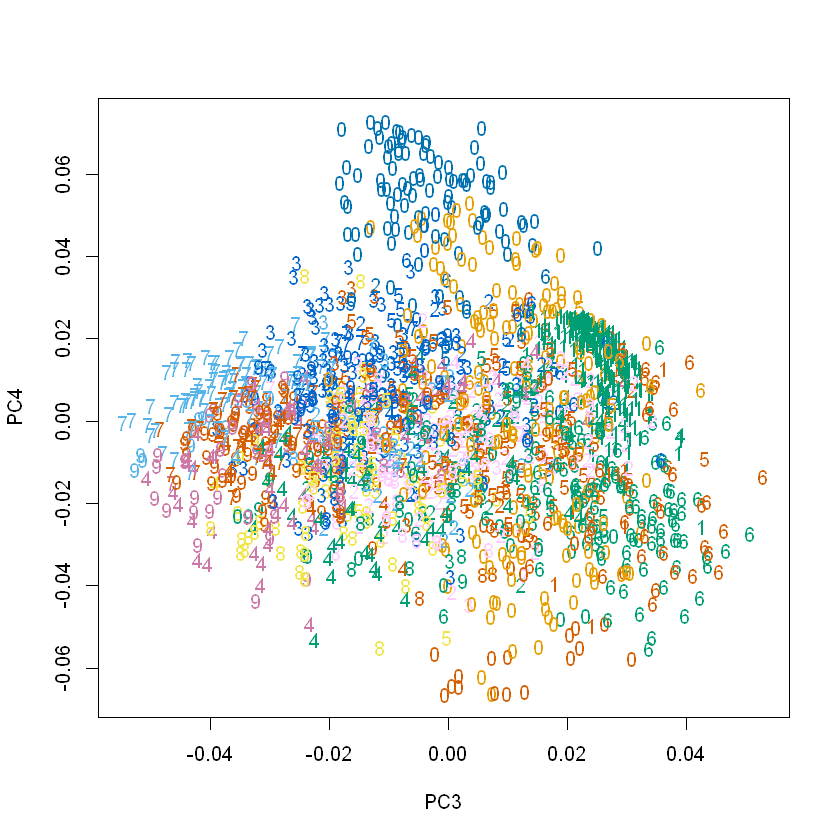

In [23]:
table(pp<-cutree(hc_complete, h=0.15),Numbers[,1])
plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp]) # Scatter plot with the labels
plot(ssn$u[,3:4],xlab="PC3",ylab="PC4",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp]) # Scatter plot with the labels


What if you change to average linkage?

Warning message in `labels<-.dendrogram`(`*tmp*`, value = NULL):
"The lengths of the new labels is shorter than the number of leaves in the dendrogram - labels are recycled."
Warning message in rep(new_labels, length.out = leaves_length):
"'x' is NULL so the result will be NULL"


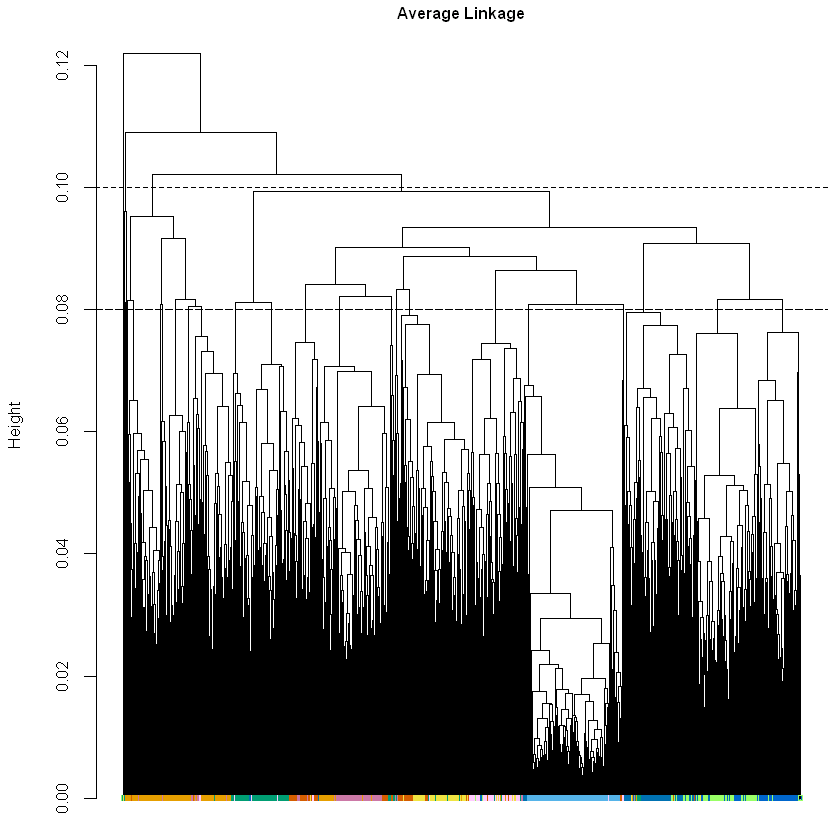

In [24]:
hc_average <- hclust(dist(ssn$u[,1:10]), method = "average")

plot_dendro(Numbers[,1],hc_average, "Average Linkage", c(0.08,0.1))


    
       0   1   2   3   4   5   6   7   8   9
  1   19   0   0   0   1   0   3   0   0   0
  2  161   0   2   1   0   4  21   0   4   0
  3    0   0   2   5  22   1   0 148   1 129
  4    8 274  21 164  13  66   9   2 112   8
  5   50   0   9   6   4  84 144   0   8   0
  6   93   0   0   0   0   2   2   0   0   0
  7    2   0  22   1 130   4   6   1   5  42
  8    0   0 158   0   8   0   1   0   4   0
  9    0   0   4   3   0   0   0   1   0   0
  10   0   0   1   0   0   0   0   0   0   0
  11   0   0   0   0   1   0   0   0   0   3

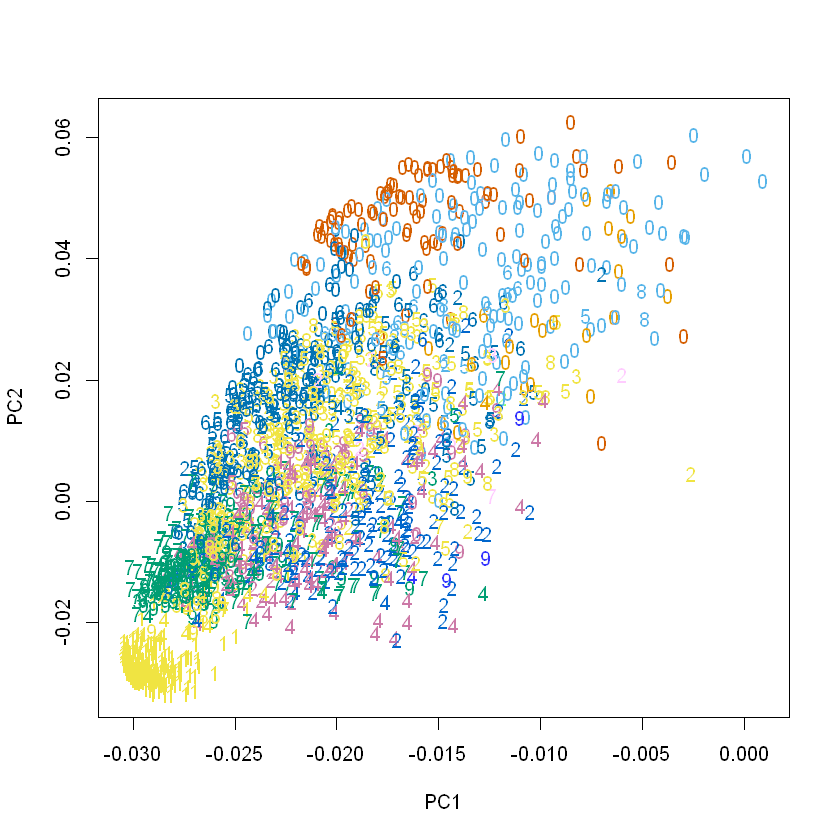

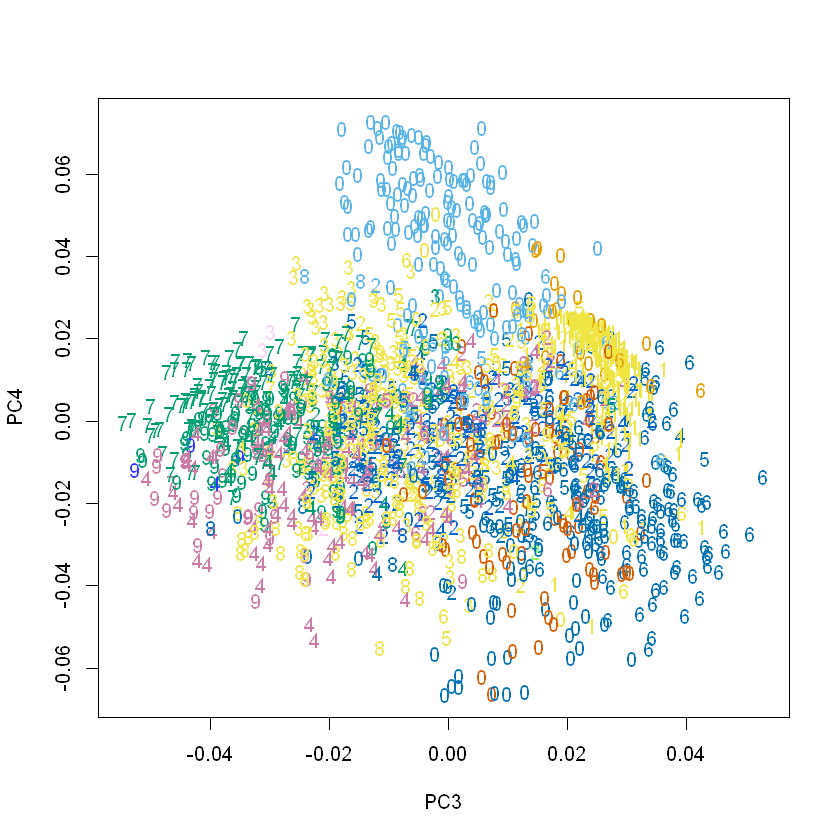

In [25]:
table(pp<-cutree(hc_average, h=0.09),Numbers[,1])
plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp]) # Scatter plot with the labels
plot(ssn$u[,3:4],xlab="PC3",ylab="PC4",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp]) # Scatter plot with the labels


You can change to 1-correlation as the distance metric. What changes now?

Warning message in `labels<-.dendrogram`(`*tmp*`, value = NULL):
"The lengths of the new labels is shorter than the number of leaves in the dendrogram - labels are recycled."
Warning message in rep(new_labels, length.out = leaves_length):
"'x' is NULL so the result will be NULL"


    
       0   1   2   3   4   5   6   7   8   9
  1  109   0  46   2   7   5  14   0   0   0
  2   59   0   5  12  11   7  22   8   0   5
  3    1   0   3   2   5   0   0 135   1  45
  4    4 207  24   4  74   6   4   1   6  16
  5    5   0   1   3   0  75  19   0   2   0
  6  136   1   1   0  15   2 125   0   0   1
  7   18   0 128  12   1   2   1   1  31   3
  8    0   0   3  32  14   6   0   0  58   3
  9    0  64   0   0  45   3   0   4  27  53
  10   1   0   8 102   0   5   0   0   1   0
  11   0   2   0  11   7  50   1   3   8  56

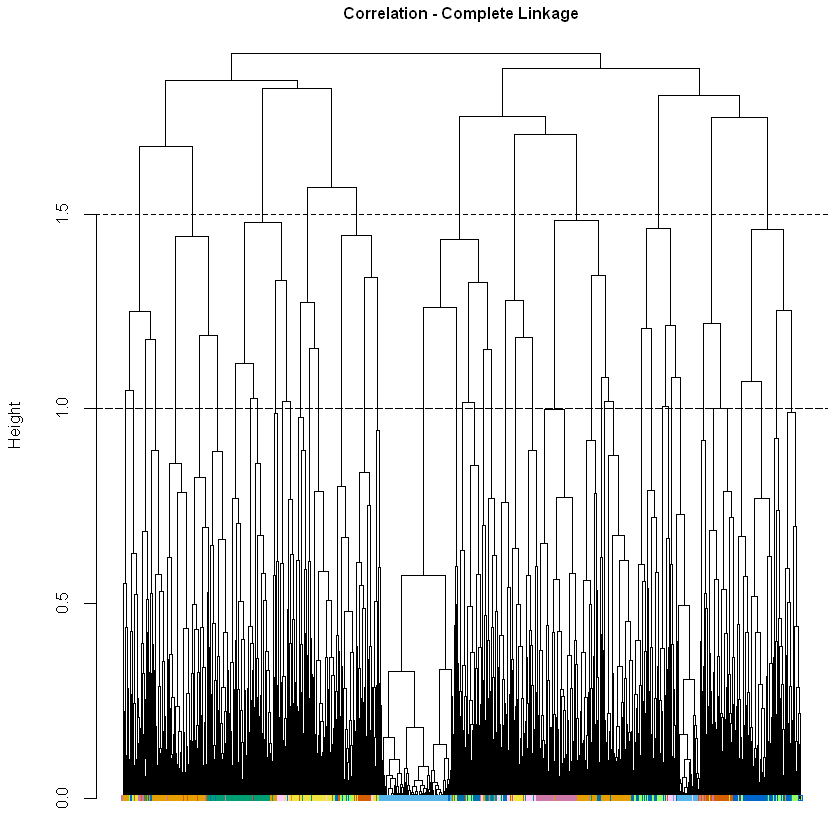

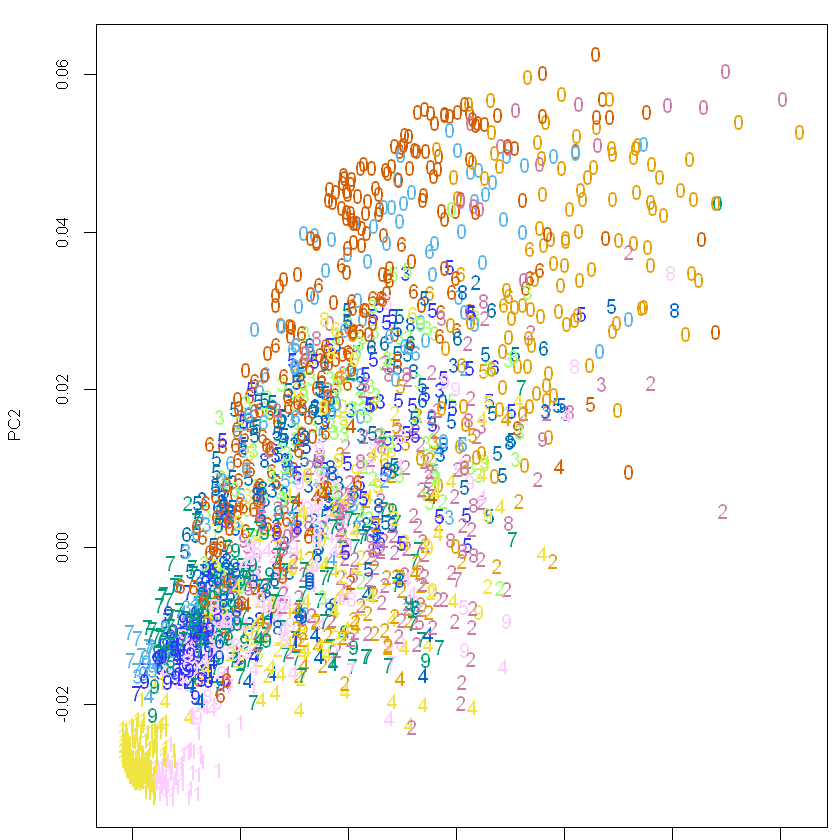

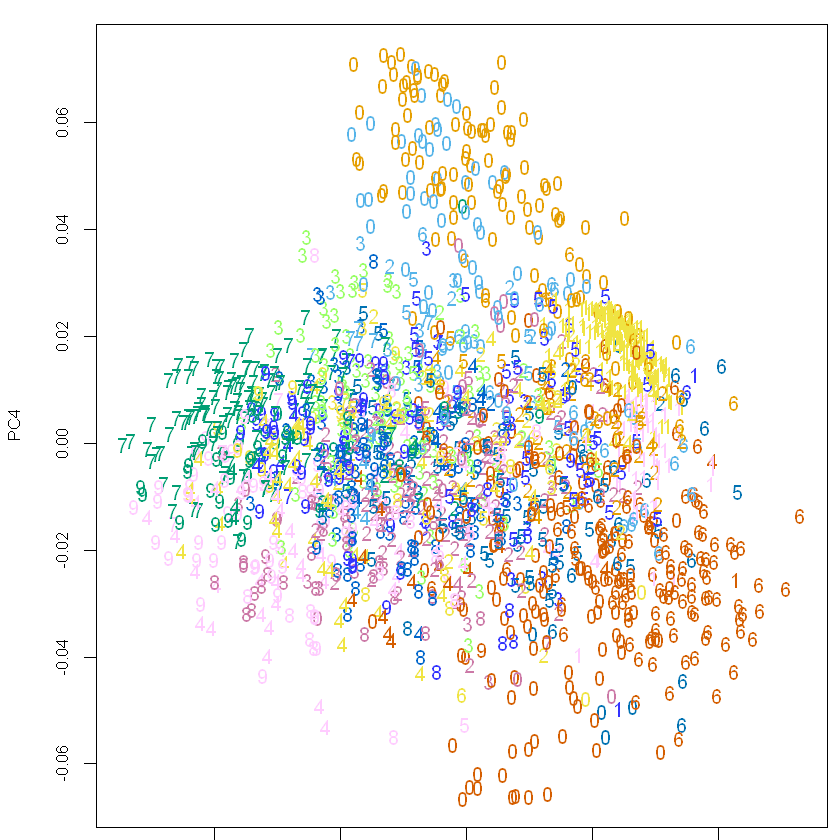

In [26]:
hc_complete <- hclust(as.dist(1-cor(t(ssn$u[,1:10]))), method = "complete")

plot_dendro(Numbers[,1],hc_complete, "Correlation - Complete Linkage", c(1.0,1.5))

table(pp<-cutree(hc_complete, h=1.5),Numbers[,1])
plot(ssn$u[,1:2],xlab="PC1",ylab="PC2",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp]) # Scatter plot with the labels
plot(ssn$u[,3:4],xlab="PC3",ylab="PC4",pch=as.character(Numbers[,1]),col=cbPalette[-1][pp]) # Scatter plot with the labels



Finally, let us turn to model based clustering. The *Mclust* package in R implements Gaussian mixture models of different kinds; similar to the spectrum between QDA and LDA the method chooses if cluster covariances should be equal or vary and in what way. 

Variants include different volume, shape and orientation refering to spread of clusters, different spread for different features and correlation between features being allowed to vary between clusters or not. 

The choice for the number of clusters is based on the Bayesian Information Criterion which trades off goodness-of-fit (the log-likelihood) with the number of parameters. Restricting the covariance matrices for the clusters can save on a lot of parameters and lead to more stable cluster estimation or even "affording" to have more clusters. This will be highly data dependent so try this on e.g. the iris data or the wine data as well to see what happens.

Installing package into 'C:/Users/jornsten/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'mclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jornsten\AppData\Local\Temp\RtmpUF0q45\downloaded_packages


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: 'mclust'


The following object is masked from 'package:purrr':

    map




---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 12
components: 

 log-likelihood    n  df      BIC      ICL
       63596.63 2000 791 121180.9 120988.4

Clustering table:
  1   2   3   4   5   6   7   8   9  10  11  12 
175 206 107 287 144 185 268 126 158 156  37 151 
    
       0   1   2   3   4   5   6   7   8   9
  1  169   0   0   0   0   0   6   0   0   0
  2    0   0   0   4  21   0   0  11  74  96
  3    0 106   0   0   1   0   0   0   0   0
  4   19   3  52  33  27  40  37  17  47  12
  5  141   0   0   0   0   1   2   0   0   0
  6    0   1  14   0 124   3   0   1   2  40
  7    1   0   3 142   0 110   0   0  11   1
  8    0 126   0   0   0   0   0   0   0   0
  9    0   0   0   0   2   0   0 123   0  33
  10   0   0 150   1   2   0   3   0   0   0
  11   0  37   0   0   0   0   0   0   0 

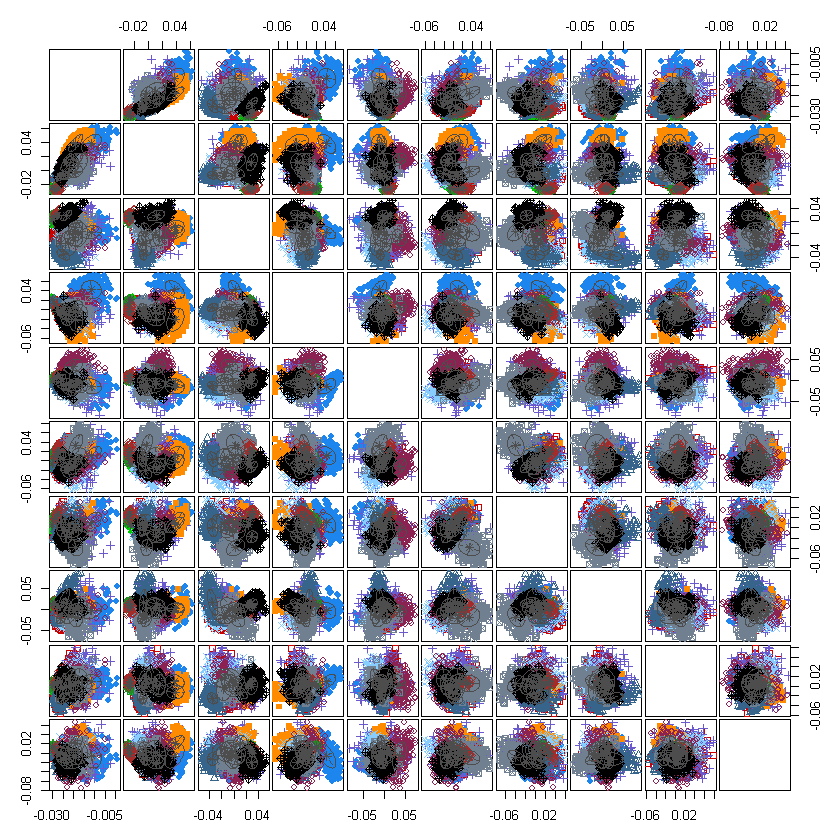

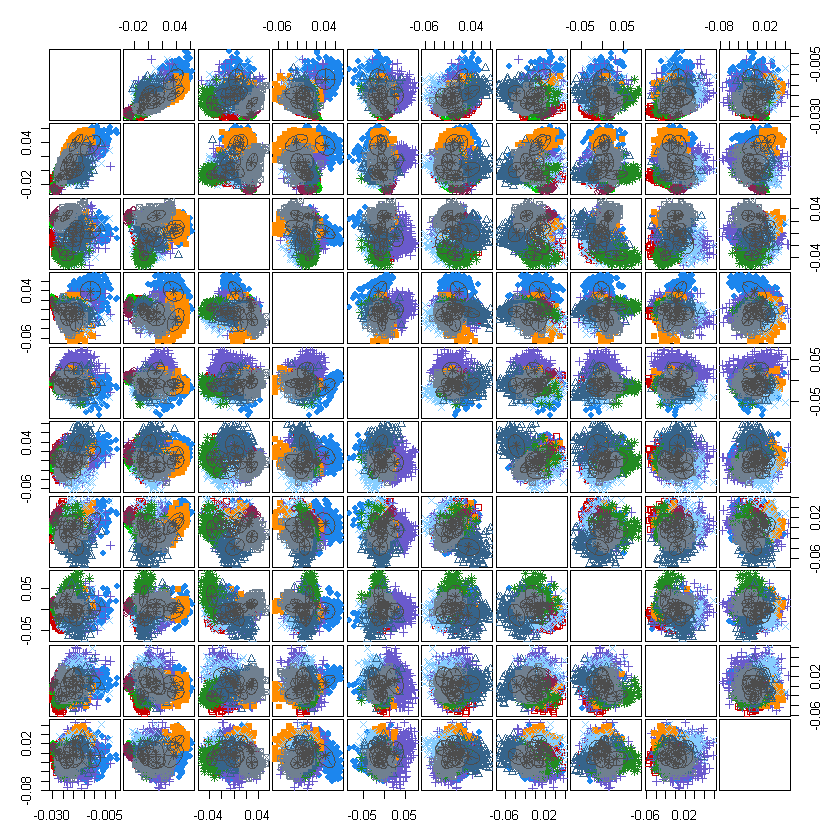

In [28]:
install.packages("mclust")
library(mclust)
#
nuse<-10 #
#
mm<-Mclust(ssn$u[,1:nuse], G=seq(1,15)) # run on 10 leading PC components - try different choices
# Mclust will choose the number of clusters via BIC
print(summary(mm))
print(table(mm$classification,Numbers[,1]))
#
plot(mm,what="classification")
#
mm10<-Mclust(ssn$u[,1:nuse],G=10)  # Here I fix the number of clusters to 10
print(summary(mm10))
print(table(mm10$classification,Numbers[,1]))
# With 10 clusters, check which numbers are well clustered... 
plot(mm10,what="classification")

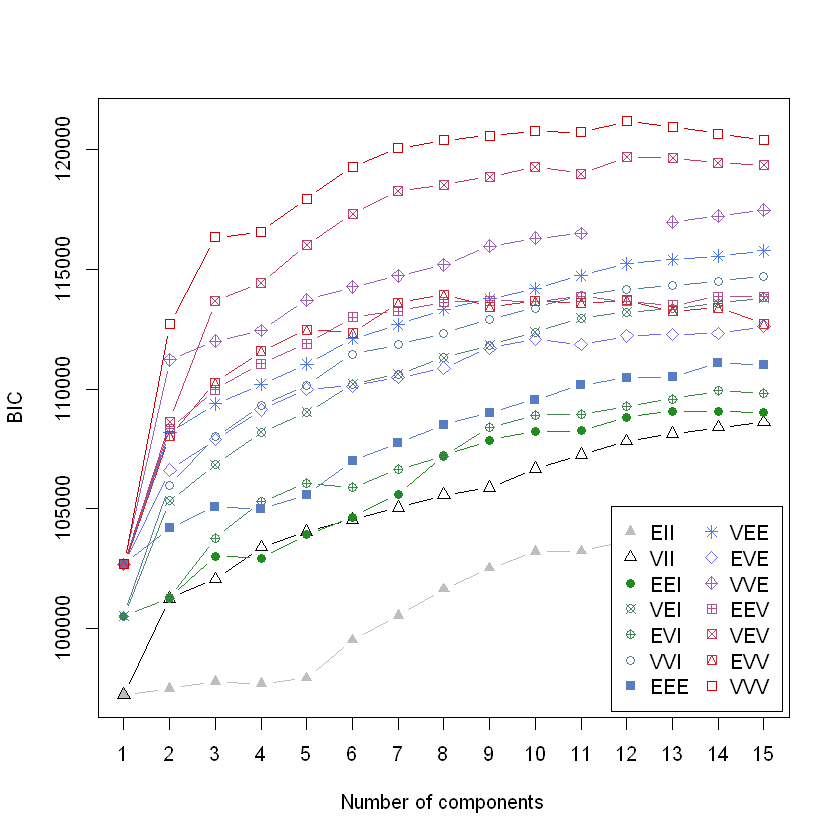

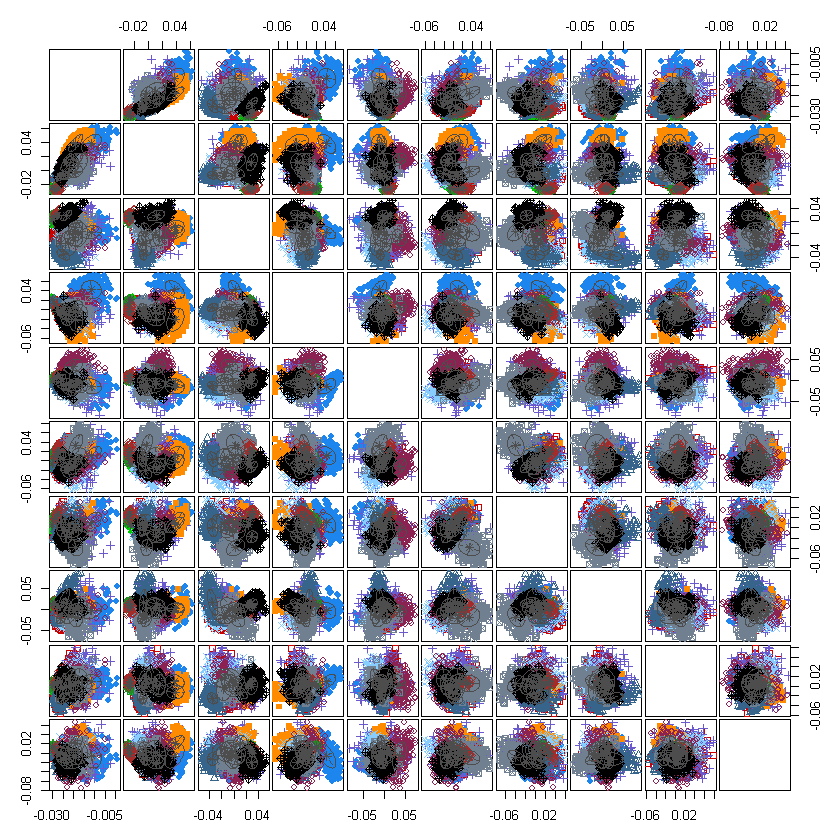

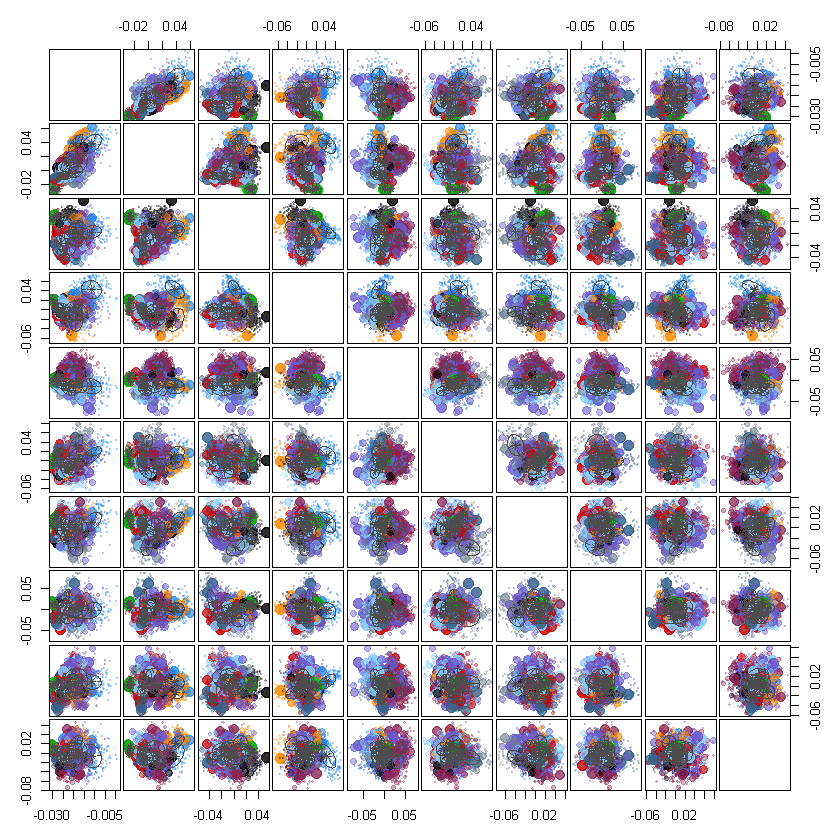

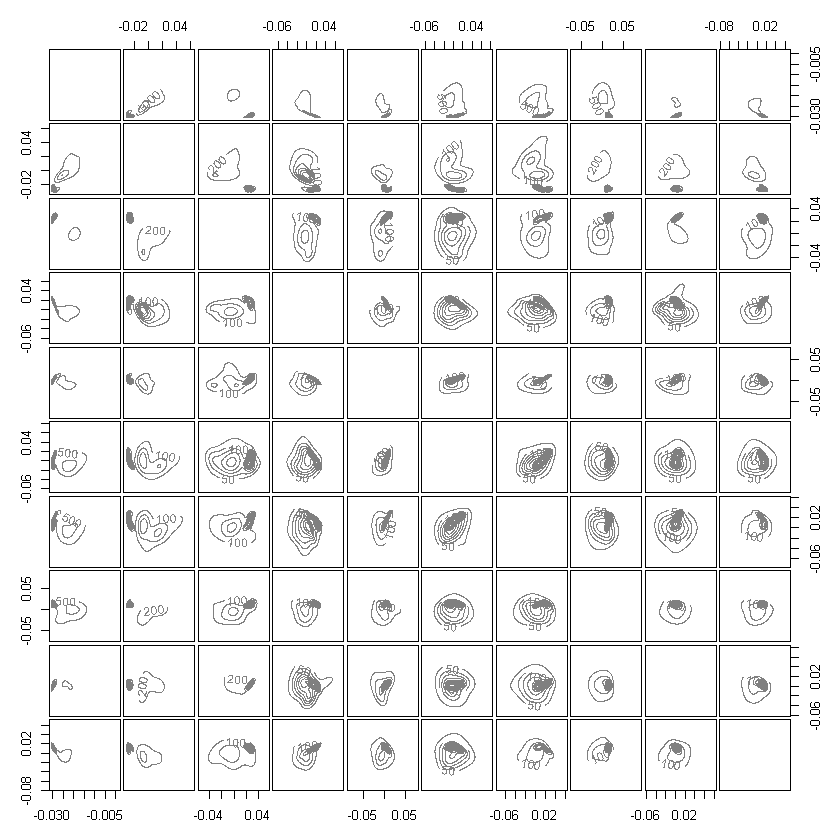

In [29]:
plot(mm)  #Looking at the BIC criterion for the different model variants as a function of the number of clusters.

How well do the clusters agree with the true labels?

In [30]:
table(mm$classification, Numbers[,1])
external_validation(Numbers[,1],mm$classification)
table(mm10$classification, Numbers[,1])
external_validation(Numbers[,1],mm10$classification)

    
       0   1   2   3   4   5   6   7   8   9
  1  169   0   0   0   0   0   6   0   0   0
  2    0   0   0   4  21   0   0  11  74  96
  3    0 106   0   0   1   0   0   0   0   0
  4   19   3  52  33  27  40  37  17  47  12
  5  141   0   0   0   0   1   2   0   0   0
  6    0   1  14   0 124   3   0   1   2  40
  7    1   0   3 142   0 110   0   0  11   1
  8    0 126   0   0   0   0   0   0   0   0
  9    0   0   0   0   2   0   0 123   0  33
  10   0   0 150   1   2   0   3   0   0   0
  11   0  37   0   0   0   0   0   0   0   0
  12   3   1   0   0   2   7 138   0   0   0

[1] 0.4578146

    
       0   1   2   3   4   5   6   7   8   9
  1  176   0   5   0   0   2  19   0   0   0
  2    0   0   0   1  32   0   0  32  11 128
  3    0 165   0   0   1   0   0   0   0   0
  4    6   4  22 177   3 149  19   3 119   7
  5  144   0   0   0   0   0   4   0   1   0
  6    3   0  18   0 139   2   1   3   3  37
  7    0 104   0   0   0   0   0   0   0   0
  8    0   0   2   0   1   0   0 113   0  10
  9    1   0 172   2   1   0   4   1   0   0
  10   3   1   0   0   2   8 139   0   0   0

[1] 0.4859825

Clustering is *not* the same as classification. The methods are good at separating 0s, 1s, 2s, 7s and 6s from the rest but spend clusters refining these groups rather than finding the other classes. 
If you run a classifier for example, it is able to find all classes quite easily (Note this is training error - try on a hold-out data set and see what happens). That's the power of *supervised learning*.

In [32]:
library(MASS)
qq<-qda(x=ssn$u[,1:10],grouping=as.factor(Numbers[,1]))
pp<-predict(qq,xnew=ssn$u[,1:10])
table(pp$class,Numbers[,1])


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




   
      0   1   2   3   4   5   6   7   8   9
  0 322   0   4   1   0   4   7   0   0   0
  1   0 268   0   0   1   0   0   0   0   0
  2   1   0 202   2   2   1   3   0   0   1
  3   1   0   6 161   0   6   0   0   3   1
  4   0   1   3   0 161   0   1   0   3   5
  5   4   1   1   8   0 145   1   0   4   1
  6   4   1   1   0   2   3 173   0   0   0
  7   0   0   1   0   1   0   0 145   0   6
  8   1   3   1   7   2   1   1   1 123   2
  9   0   0   0   1  10   1   0   6   1 166

What if we investigate a smaller set of digits? Can we get a clearer picture of what good clustering separation looks like? Try this at home with different subset of digits. Here, I choose 0s, 1s and 2s.

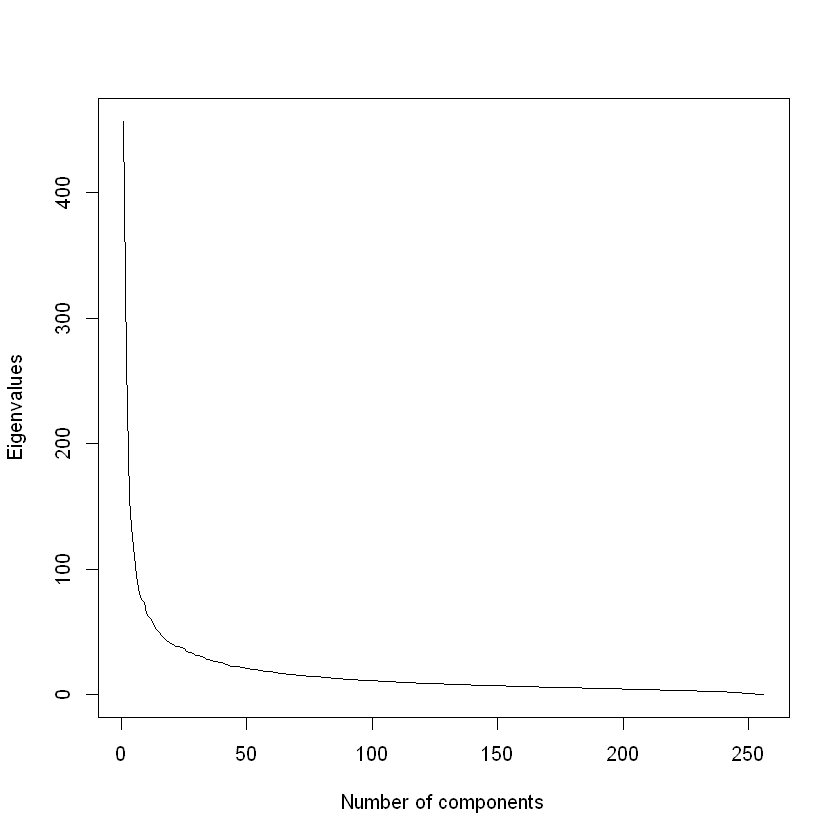


  0   1   2 
806 700 494 

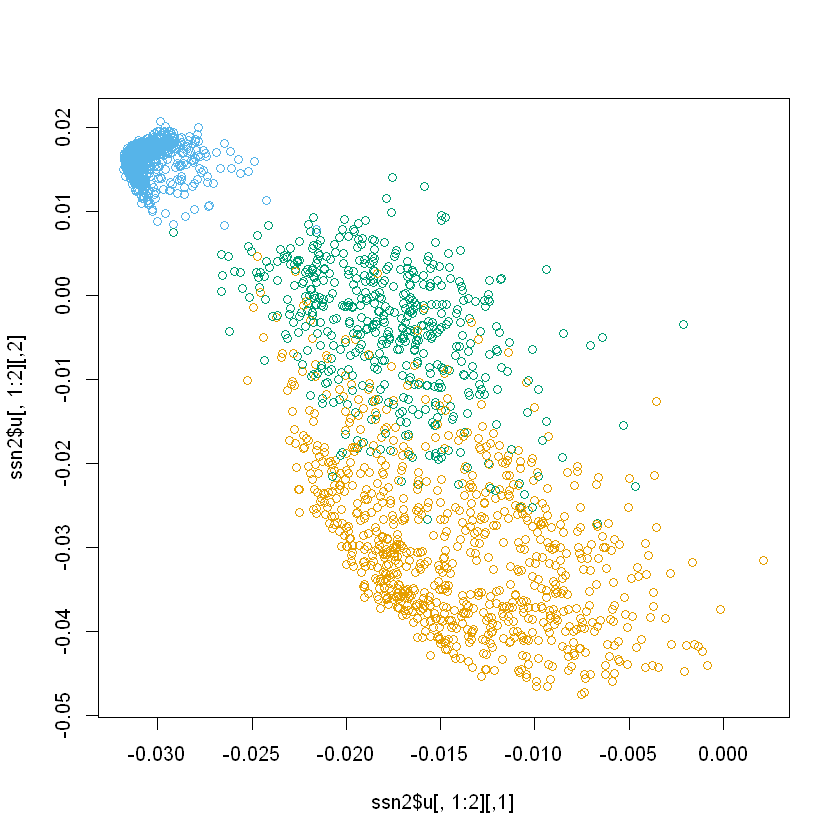

In [33]:
Numbers2<-rbind(zip.train[zip.train[,1]==0,], zip.train[zip.train[,1]==1,],zip.train[zip.train[,1]==2,]) 
# a subset of the digits

ss<-sample(seq(1,dim(Numbers2)[1]),2000)
Numbers2<-Numbers2[ss,]

#
ssn2<-svd(Numbers2[,-1])  # Computing the SVD of digits data
plot(ssn2$d,type="l",xlab="Number of components",ylab="Eigenvalues") # screeplot 

plot(ssn2$u[,1:2],col=cbPalette[-1][Numbers2[,1]+1])
table(Numbers2[,1])

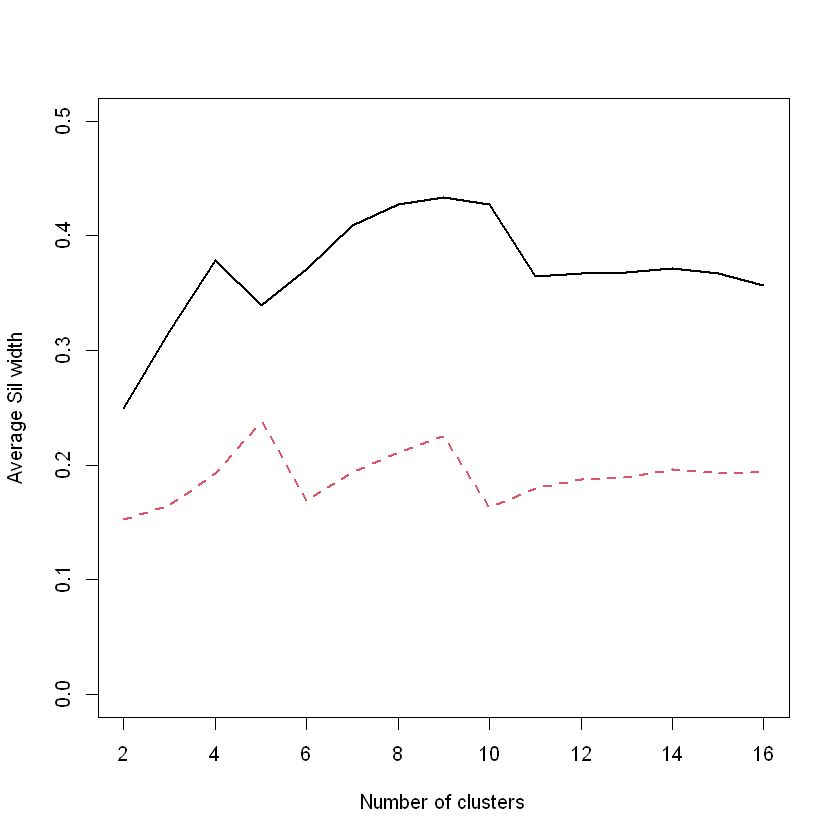

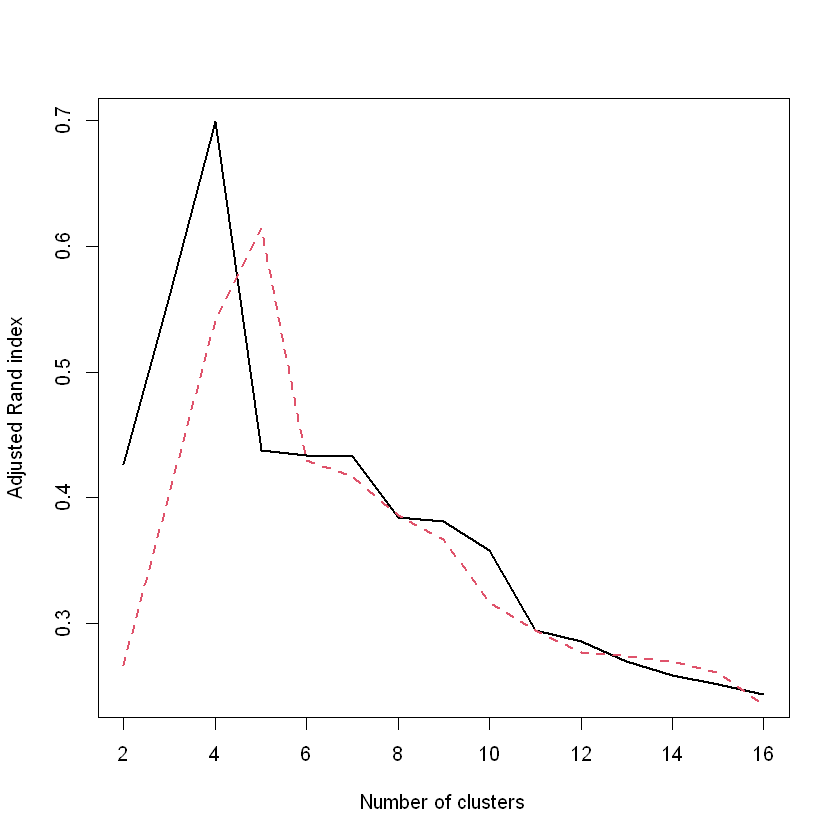

In [34]:
nuse <- 10

SilAvg <- matrix(0,15,2)
AdjRand <- matrix(0,15,2)
par(mfrow=c(2,2))
Ksel<-c(3,5,10,15)
Ind<-c(1,2,3,4)
plist1<-list()
plist2<-list()
a<-0
#
for (K in (2:16)) {
  pp1 <- pam(as.dist(1-cor(t(ssn2$u[,1:nuse]))),K) 
  pp2 <- pam(dist(ssn2$u[,1:nuse]),K) 
  SilAvg[K-1,1] <- pp1$silinfo$avg 
  SilAvg[K-1,2] <- pp2$silinfo$avg 
  AdjRand[K-1,1] <- external_validation(Numbers2[,1],pp1$cluster)
  AdjRand[K-1,2] <- external_validation(Numbers2[,1],pp2$cluster)
  #
  if (any(Ksel==K)) {
     a<-a+1
     plsil<-plotsilhoutte(pp1$cluster,silhouette(pp1))
     plist1[[a]]<-plsil
     plsil<-plotsilhoutte(pp1$cluster,silhouette(pp2))
     plist2[[a]]<-plsil
  }
}  
   
par(mfrow = c(1,1))
plot(seq(2,16),SilAvg[,1],type="l",lwd=2,xlab="Number of clusters", ylab="Average Sil width",ylim=c(0,0.5))
lines(seq(2,16),SilAvg[,2],col=2,lwd=2,lty=2)
plot(seq(2,16),AdjRand[,1],type="l",lwd=2, xlab="Number of clusters", ylab="Adjusted Rand index")
lines(seq(2,16),AdjRand[,2],col=2,lwd=2,lty=2)


It's not easy to choose the number of clusters based on the silhouette width. Let's try with 4 and 5 clusters (this is based on euclidean - red dashed). Can we separate 0s, 1s and 2s?

[1] 0.5414305

   
      0   1   2
  1  18 697  10
  2  78   1 239
  3 328   0  13
  4 382   2 232

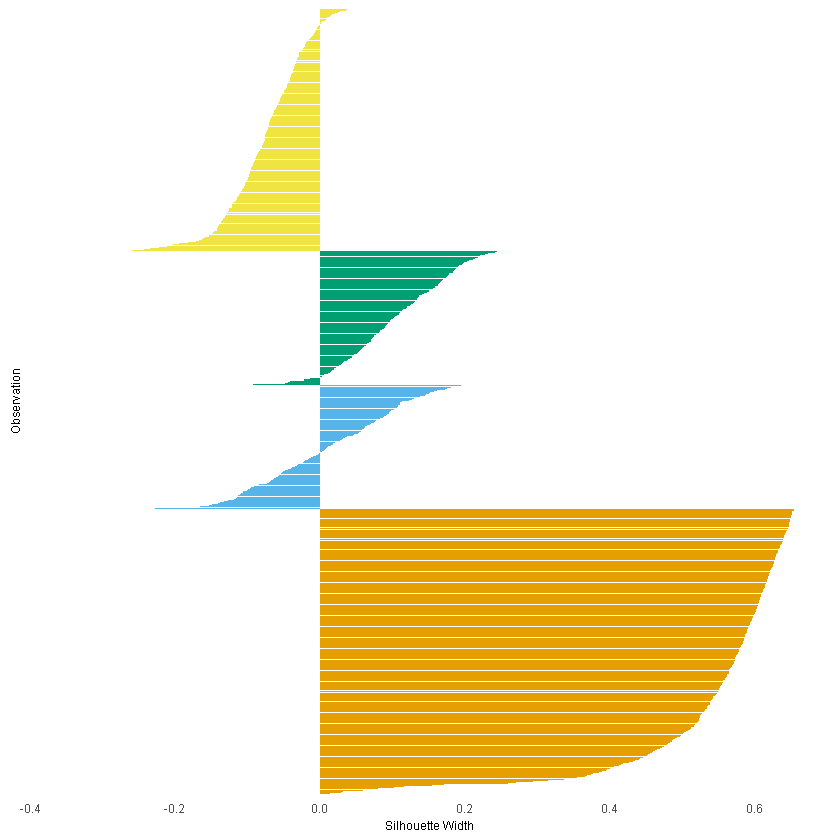

[1] 0.6140237

   
      0   1   2
  1  30 699  28
  2  36   0 183
  3 433   0  10
  4  36   1 269
  5 271   0   4

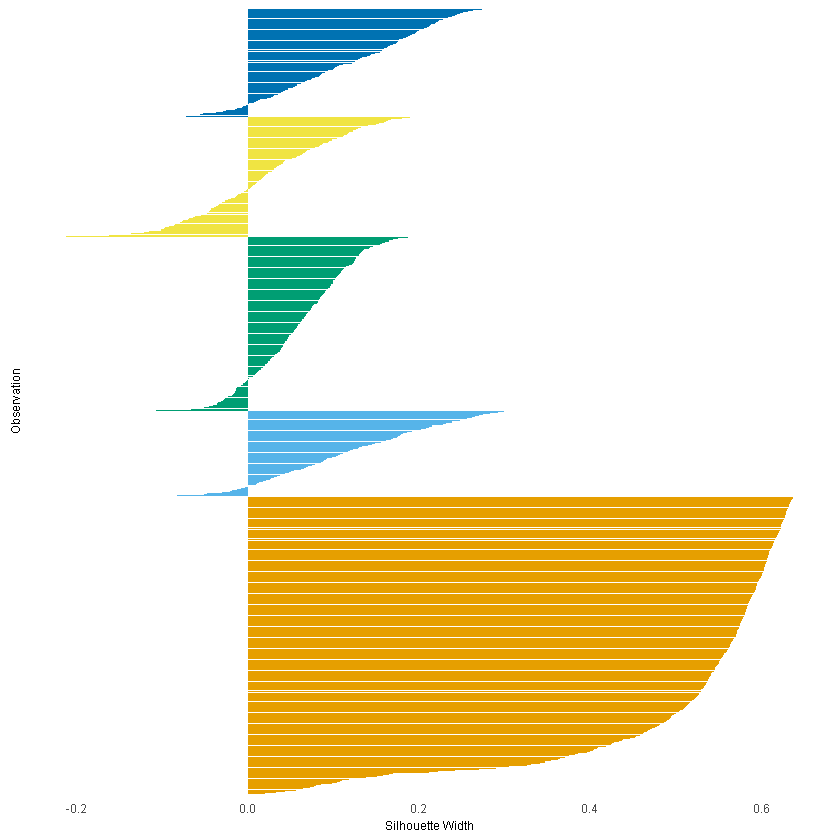

In [35]:
pp <- pam(dist(ssn2$u[,1:nuse]),4) 
plsil<-plotsilhoutte(pp$cluster,silhouette(pp))
plsil
external_validation(Numbers2[,1],pp$cluster)
table(pp$cluster,Numbers2[,1])

pp <- pam(dist(ssn2$u[,1:nuse]),5) 
plsil<-plotsilhoutte(pp$cluster,silhouette(pp))
plsil
external_validation(Numbers2[,1],pp$cluster)
table(pp$cluster,Numbers2[,1])

The ARI is slightly better for this reduced data set but still not great - reason being again that the clustering focuses more on refining the classes than detecting all. With 5 clusters, we almost get the digits separated, with 2 subclasses being formed for digits 0 and 2.


If we cluster the reduced data set with model based clustering - how many clusters do we find?

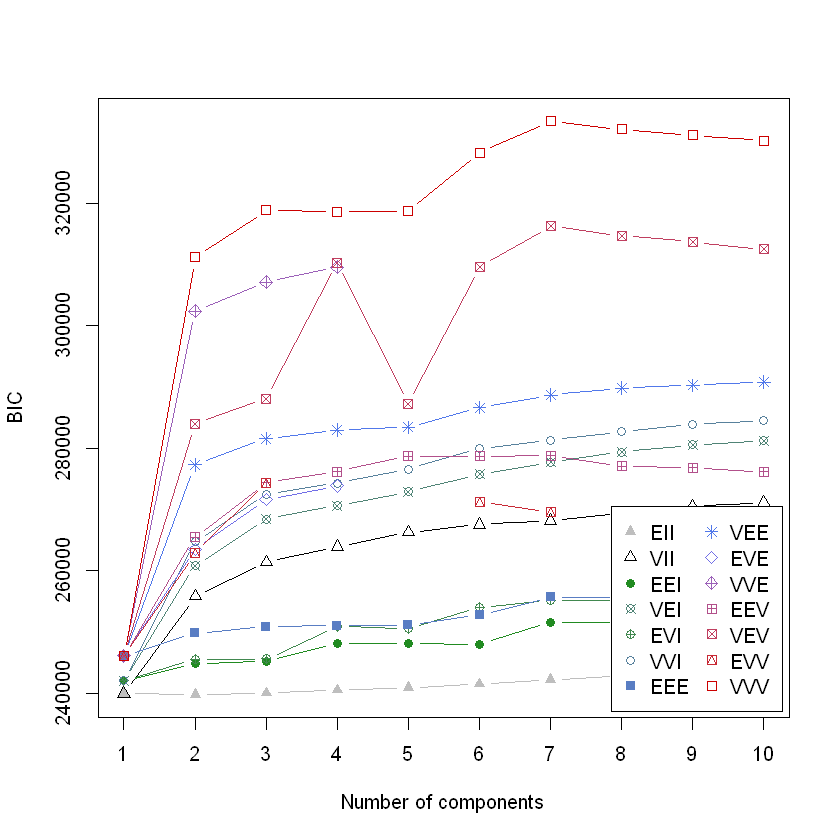

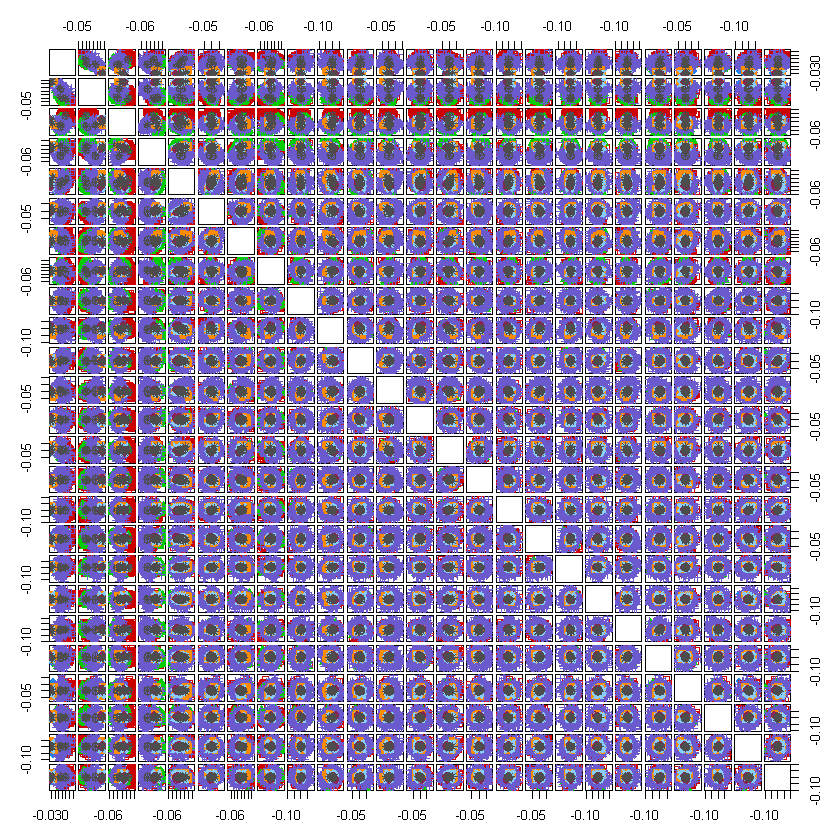

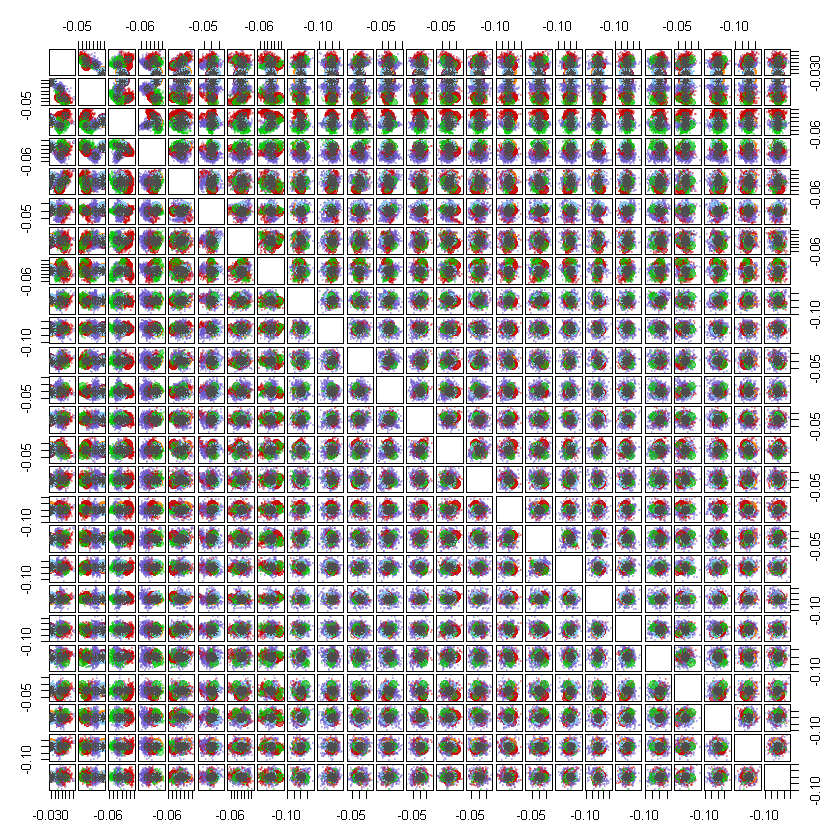

   
      0   1   2
  1   0 129   0
  2 401   0   0
  3 386   0   0
  4  19   3 494
  5   0  85   0
  6   0 295   0
  7   0 188   0

[1] 0.5604516

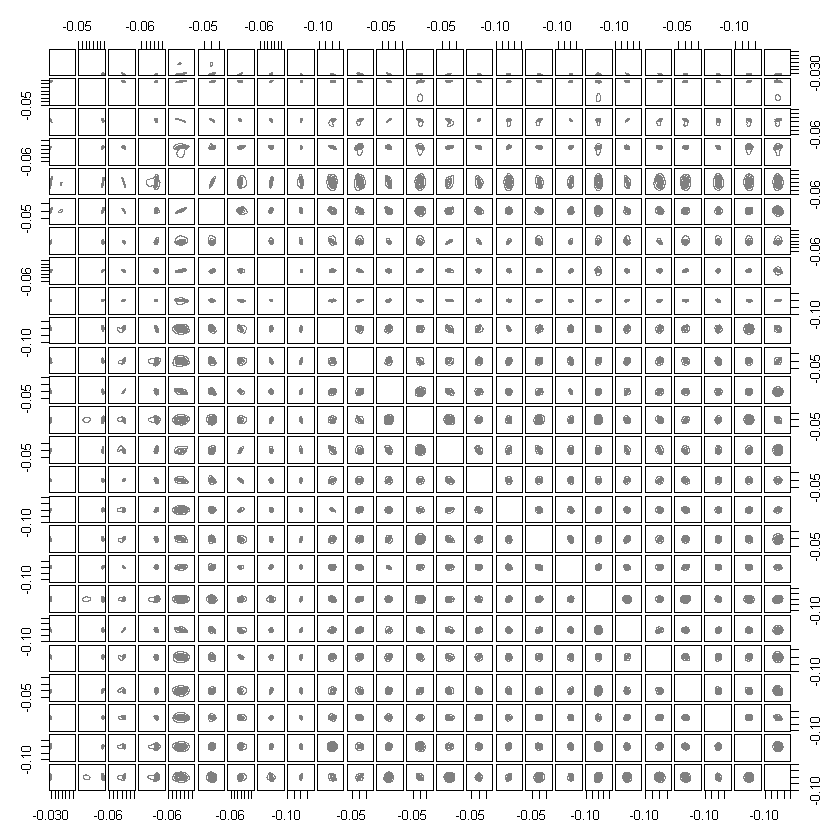

In [36]:
nuse <-25

mm<-Mclust(ssn2$u[,1:nuse],G=seq(1,10))
plot(mm)
table(mm$classification, Numbers2[,1])
external_validation(Numbers2[,1],mm$classification)

Mclust supports more clusters than digits even for the 0s, 1s and 2s data set. Below I show what some random selection of digits for each cluster looks like - you can see that Mclust has separated digits with different characteristics, e.g. "fat" and "thin" digits etc.

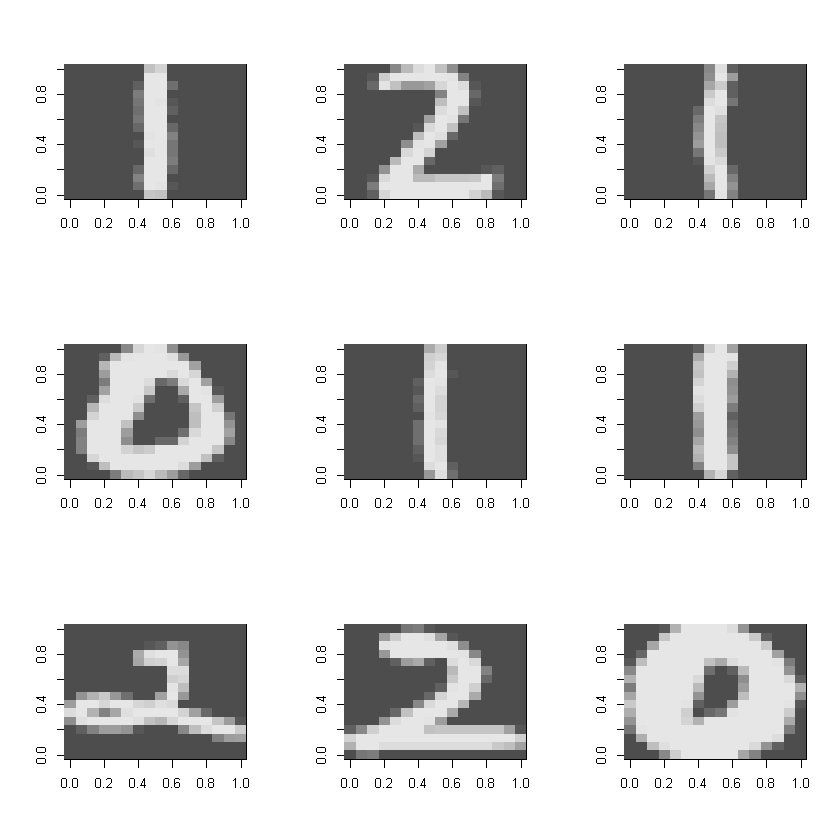

In [280]:
par(mfrow=c(3,3))       # The digits can look quite different - run this a couple of times to see.
for (zz in (1:min(c(mm$G,9)))) {
  iz<-sample(seq(1,dim(Numbers2)[1])[mm$classification==zz],1)
  image(t(matrix(as.numeric(Numbers2[iz,-1]),16,16,byrow=T))[,16:1], col = gray.colors(33))
}